In [1]:
!pip install arviz
!pip install pymc3
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from scipy import stats
from scipy.special import expit as logistic

     |████████████████████████████████| 1.6 MB 513 kB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 55.6 MB/s eta 0:00:01
     |████████████████████████████████| 870 kB 37.6 MB/s eta 0:00:01
     |████████████████████████████████| 239 kB 56.8 MB/s eta 0:00:01
     |████████████████████████████████| 872 kB 519 kB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 24.8 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 35.4 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 77 kB 2.9 MB/s  eta 0:00:01
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=176fedc691fbe4b2afdc05cc01e7595313a1b171f4b74f7da46dc07e9988e1d4
  Stored in directory: /root/.cache/pip/wheels/04/22/4d/832878ba2fe9ea3543f0189b9288a78e4aa4e0afc851a6890c
Successfully built theano-pymc


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "waic"

In [3]:
az.rcParams.keys()

KeysView(RcParams({'data.http_protocol': 'https',
          'data.index_origin': 0,
          'data.load': 'lazy',
          'data.log_likelihood': True,
          'data.metagroups': {'latent_vars': ('posterior', 'prior'),
                              'observed_vars': ('posterior_predictive',
                                                'observed_data',
                                                'prior_predictive'),
                              'posterior_groups': ('posterior',
                                                   'posterior_predictive',
                                                   'sample_stats',
                                                   'log_likelihood'),
                              'posterior_groups_warmup': ('_warmup_posterior',
                                                          '_warmup_posterior_predictive',
                                                          '_warmup_sample_stats'),
                              'prior_groups

#### Code 13.1

EF

In [4]:
import os
os.chdir('/ECT')
ef = pd.read_csv("./Abbott/Long_FS_Efield_Results2.txt", sep="\t")
print(ef.shape)
ef.head(10)

(4943, 5)


Ursi  Region  Average_Intensity  Max_Intensity  Unnamed: 4
0  M87105256        2          44.713495      72.883247         NaN
1  M87105256        3          16.707266      18.307795         NaN
2  M87105256        7          37.381191      46.290985         NaN
3  M87105256        8          28.137607      40.835445         NaN
4  M87105256       10          35.980784      51.973476         NaN
5  M87105256       11          26.378476      40.006542         NaN
6  M87105256       12          31.791150      42.636517         NaN
7  M87105256       13          41.233026      52.369827         NaN
8  M87105256       16          38.471081      51.861031         NaN
9  M87105256       17          26.502785      41.310093         NaN

Delta Volume

In [5]:
dvol = pd.read_csv("./Abbott/Miklos_group_fs_vol_long.txt", sep=" ")
print(dvol.shape)
dvol.head(10)

(16724, 4)


Ursi  Study                    Region_Label   Volume
0  M87105256      1                 ctx_lh_bankssts   2211.0
1  M87105256      1  ctx_lh_caudalanteriorcingulate   1756.0
2  M87105256      1      ctx_lh_caudalmiddlefrontal   7691.0
3  M87105256      1                   ctx_lh_cuneus   3210.0
4  M87105256      1               ctx_lh_entorhinal   2291.0
5  M87105256      1                 ctx_lh_fusiform  11471.0
6  M87105256      1         ctx_lh_inferiorparietal   9726.0
7  M87105256      1         ctx_lh_inferiortemporal   9075.0
8  M87105256      1         ctx_lh_isthmuscingulate   2932.0
9  M87105256      1         ctx_lh_lateraloccipital  10578.0

In [6]:
ECT_params = pd.read_csv('./Abbott/ECT-params.csv')
ECT_params.head(10)

Unnamed: 0         id       cor     slope    inters  charge  pulsenumber  \
0           1  M87105256 -0.157913 -0.114422 -0.784451   619.2         2480   
1           2  M87105615  0.263814  0.209864  0.009336   595.2         2480   
2           3  M87106245  0.119097  0.142769 -0.134036   576.0         2120   
3           4  M87107641 -0.012798  0.030454  0.345955   520.8         2480   
4           5  M87112316  0.318465  0.198415  0.068148   892.0         4960   
5           6  M87113155  0.019998  0.080674 -0.067843  1785.6         9920   
6           7  M87121072 -0.030556  0.056069  0.166958   722.4         3440   
7           8  M87123952  0.123968  0.113052  0.533284  1267.0         1810   
8           9  M87125630  0.136420  0.114317  0.946861   616.8         2600   
9          10  M87128072  0.059533  0.113342  0.321992   710.4         2960   

   pulsewidth  duration  eeg        freq  amp  
0    0.300000      26.0  178   40.000000  600  
1    0.300000      22.0  361   53.333333  800  
2    0.416667      21.0  334   46.666667  800  
3    0.300000      22.0  395   53.333333  700  
4    0.300000      34.0  321   70.000000  600  
5    0.300000      48.0  204  103.333333  600  
6    0.300000      26.0  136   60.000000  700  
7    1.000000      36.5  387   24.166667  700  
8    0.416667      23.0  340   50.000000  700  
9    0.300000      24.0  280   56.666667  800

In [7]:
volef_wide = pd.read_csv('./Abbott/volef-wide.csv')
volef_wide.head(10)
volef_wide.shape

(4368, 15)

In [79]:
nmdata = pd.merge(volef_wide, ECT_params, left_on='Ursi', right_on='id')
nmdata.shape
nmdata.columns

(4284, 27)

Index(['Unnamed: 0_x', 'Region', 'Ursi', 'Region_Label', 'Volume.2',
       'Average_Intensity.2', 'Max_Intensity.2', 'Volume.1',
       'Average_Intensity.1', 'Max_Intensity.1', 'Volume.3',
       'Average_Intensity.3', 'Max_Intensity.3', 'dvol3', 'dvol',
       'Unnamed: 0_y', 'id', 'cor', 'slope', 'inters', 'charge', 'pulsenumber',
       'pulsewidth', 'duration', 'eeg', 'freq', 'amp'],
      dtype='object')

In [29]:
nmdata['Max_Intensity.1']

0        51.973476
1        66.514877
2        48.281452
3        49.747673
4        31.080307
           ...    
4279     84.840675
4280     68.018486
4281    103.637665
4282    113.339310
4283     46.290897
Name: Max_Intensity.1, Length: 4284, dtype: float64

In [9]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%qtconsole

In [10]:
# make the tank cluster variable
#tank = np.arange(d.shape[0])
#n_tanks = d.shape[0]

# fit
with pm.Model() as m_1_1:
    #a = pm.Normal("a", 0, 1.5, shape=n_tanks)
    sigma = pm.Exponential("sigma", 1.0)
    a = pm.Normal("a", 0, 1.0)
    b = pm.Normal("b", 0, 1.0)
    #p = pm.math.invlogit(a[tank])
    mu = a + b*nmdata['Max_Intensity.1']
    #S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    V = pm.Normal("V", mu, sigma, observed=nmdata.dvol)
    trace_1_1 = pm.sample(random_seed=RANDOM_SEED)

az.summary(trace_1_1, round_to=2)

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The acceptance probability does not match the target. It is 0.8864589488535899, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8872822144386748, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
a     -0.47  0.15     -0.72      -0.24        0.0      0.0   1509.34   
b      0.01  0.00      0.01       0.02        0.0      0.0   1577.68   
sigma  4.41  0.05      4.33       4.49        0.0      0.0   2400.33   

       ess_tail  r_hat  
a       1725.90    1.0  
b       1583.54    1.0  
sigma   1995.54    1.0

In [15]:
#ide kell berakni...

d = pd.read_csv("/resources/Rethinking_2/Data/chimpanzees.csv", sep=";")

treatment = (d.prosoc_left + 2 * d.condition).values
Ntreatments = len(np.unique(treatment))

actor = (d.actor - 1).astype(int).values
Nactor = len(np.unique(actor))

block = (d.block - 1).astype(int).values
Nblock = len(np.unique(block))

In [90]:
Nblock
#block
len(range(51))
code.Ursi[50]
i=1
indx = np.where(nmdata.Ursi == code.Ursi[i])
nmdata['sbj'] = np.zeros(nmdata.shape[0]).astype(int)
nmdata.sbj[indx[0]]
indx

6

51

'M87199321'

84     0
85     0
86     0
87     0
88     0
      ..
163    0
164    0
165    0
166    0
167    0
Name: sbj, Length: 84, dtype: int64

(array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167]),)

In [237]:
Nsubj = len(np.unique(nmdata.Ursi))
Nregi = len(np.unique(nmdata.Region_Label))
code = pd.DataFrame({'Ursi':list(np.unique(nmdata.Ursi)), 'sbj':list(range(Nsubj))})
coder = pd.DataFrame({'Region_Label':list(np.unique(nmdata.Region_Label)), 'rx':list(range(Nregi))})
nmdata['sbj'] = np.zeros(nmdata.shape[0]).astype(int)
nmdata['rgn'] = np.zeros(nmdata.shape[0]).astype(int)

for i in range(Nsubj):
    indx = np.where(nmdata.Ursi == code.Ursi[i])
    nmdata.sbj.iloc[indx[0]] = code.sbj[i]
for i in range(Nregi):
    indx = np.where(nmdata.Region_Label == coder.Region_Label[i])
    nmdata.rgn.iloc[indx[0]] = coder.rx[i]
nmdata.head()
np.unique(nmdata.rgn)

/tmp/ipykernel_1544/3272332842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmdata.sbj.iloc[indx[0]] = code.sbj[i]
/tmp/ipykernel_1544/3272332842.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmdata.rgn.iloc[indx[0]] = coder.rx[i]


Unnamed: 0_x  Region       Ursi                    Region_Label  Volume.2  \
0             1      10  M87105256            Left-Thalamus-Proper    7685.0   
1           149    1002  M87105256  ctx-lh-caudalanteriorcingulate    1668.0   
2           297    1003  M87105256      ctx-lh-caudalmiddlefrontal    8199.0   
3           445    1005  M87105256                   ctx-lh-cuneus    2891.0   
4           593    1006  M87105256               ctx-lh-entorhinal    2192.0   

   Average_Intensity.2  Max_Intensity.2  Volume.1  Average_Intensity.1  \
0            35.980784        51.973476    7441.5            35.980784   
1            47.705159        66.514877    1756.0            47.705159   
2            33.790458        48.281452    7691.0            33.790458   
3            37.719310        49.747673    3210.0            37.719310   
4            20.984886        31.080307    2291.0            20.984886   

   Max_Intensity.1  ...  charge  pulsenumber  pulsewidth  duration  eeg  freq  \
0        51.973476  ...   619.2         2480         0.3      26.0  178  40.0   
1        66.514877  ...   619.2         2480         0.3      26.0  178  40.0   
2        48.281452  ...   619.2         2480         0.3      26.0  178  40.0   
3        49.747673  ...   619.2         2480         0.3      26.0  178  40.0   
4        31.080307  ...   619.2         2480         0.3      26.0  178  40.0   

   amp  sbj  volavbas  rgn  
0  600    0      6729    7  
1  600    0      1552   18  
2  600    0      5768   19  
3  600    0      2796   20  
4  600    0      1802   21  

[5 rows x 30 columns]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [116]:
nmdata['Max_Intensity.1'].values.reshape(-1,1)

array([[ 51.973476],
       [ 66.514877],
       [ 48.281452],
       ...,
       [103.637665],
       [113.33931 ],
       [ 46.290897]])

In [115]:
!pip install sklearn

sbj=nmdata.sbj.astype(int).values
sbj
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
hm=ss.fit_transform(nmdata['Max_Intensity.1'].values.reshape(-1,1))
np.unique(hm)

array([ 0,  0,  0, ..., 50, 50, 50])

array([-1.49760548, -1.49446483, -1.4632142 , ...,  5.66009251,
        5.66990153,  5.73833199])

In [200]:
nmdata.columns

Index(['Unnamed: 0_x', 'Region', 'Ursi', 'Region_Label', 'Volume.2',
       'Average_Intensity.2', 'Max_Intensity.2', 'Volume.1',
       'Average_Intensity.1', 'Max_Intensity.1', 'Volume.3',
       'Average_Intensity.3', 'Max_Intensity.3', 'dvol3', 'dvol',
       'Unnamed: 0_y', 'id', 'cor', 'slope', 'inters', 'charge', 'pulsenumber',
       'pulsewidth', 'duration', 'eeg', 'freq', 'amp', 'sbj'],
      dtype='object')

In [234]:
np.unique(nmdata.Region.astype(int).values)

array([   8,   10,   11,   12,   13,   17,   18,   26,   28,   47,   49,
         50,   51,   52,   53,   54,   58,   60, 1002, 1003, 1005, 1006,
       1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017,
       1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028,
       1029, 1030, 1031, 1032, 1033, 1034, 1035, 2002, 2003, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028,
       2029, 2030, 2031, 2032, 2033, 2034, 2035])

In [231]:
bv = nmdata.groupby(['Region_Label'])['Volume.1'].agg(['mean'])
nmdata['volavbas'] = np.zeros(nmdata.shape[0]).astype(int)
for i in range(Nregi):
    indx = np.where(nmdata.Region_Label == bv.index.values[i])
    nmdata.volavbas.iloc[indx[0]] = int(bv.iloc[i])
nmdata.head()
np.unique(nmdata.volavbas)

/tmp/ipykernel_1544/1796799423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmdata.volavbas.iloc[indx[0]] = int(bv.iloc[i])


Unnamed: 0_x  Region       Ursi                    Region_Label  Volume.2  \
0             1      10  M87105256            Left-Thalamus-Proper    7685.0   
1           149    1002  M87105256  ctx-lh-caudalanteriorcingulate    1668.0   
2           297    1003  M87105256      ctx-lh-caudalmiddlefrontal    8199.0   
3           445    1005  M87105256                   ctx-lh-cuneus    2891.0   
4           593    1006  M87105256               ctx-lh-entorhinal    2192.0   

   Average_Intensity.2  Max_Intensity.2  Volume.1  Average_Intensity.1  \
0            35.980784        51.973476    7441.5            35.980784   
1            47.705159        66.514877    1756.0            47.705159   
2            33.790458        48.281452    7691.0            33.790458   
3            37.719310        49.747673    3210.0            37.719310   
4            20.984886        31.080307    2291.0            20.984886   

   Max_Intensity.1  ...    inters  charge  pulsenumber  pulsewidth  duration  \
0        51.973476  ... -0.784451   619.2         2480         0.3      26.0   
1        66.514877  ... -0.784451   619.2         2480         0.3      26.0   
2        48.281452  ... -0.784451   619.2         2480         0.3      26.0   
3        49.747673  ... -0.784451   619.2         2480         0.3      26.0   
4        31.080307  ... -0.784451   619.2         2480         0.3      26.0   

   eeg  freq  amp  sbj  volavbas  
0  178  40.0  600    0      6729  
1  178  40.0  600    0      1552  
2  178  40.0  600    0      5768  
3  178  40.0  600    0      2796  
4  178  40.0  600    0      1802  

[5 rows x 29 columns]

array([  238,   492,   858,   919,  1087,  1132,  1377,  1523,  1552,
        1731,  1784,  1790,  1802,  1832,  1845,  1856,  1918,  2087,
        2137,  2184,  2305,  2339,  2392,  2406,  2428,  2486,  2796,
        2823,  2886,  3103,  3301,  3307,  3347,  3484,  3501,  3584,
        3702,  3719,  3738,  3743,  3801,  4161,  4408,  4498,  4859,
        4963,  5626,  5768,  5884,  6273,  6430,  6484,  6659,  6706,
        6729,  6941,  8228,  8453,  8744,  8780,  9063,  9150,  9253,
        9387,  9457,  9871, 10443, 10560, 10563, 10735, 11006, 11298,
       11351, 11890, 12364, 12595, 12658, 12673, 13929, 13999, 19611,
       20580, 47502, 49455])

In [ ]:
sbj=nmdata.sbj.astype(int).values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ef=ss.fit_transform(nmdata['Max_Intensity.1'].values.reshape(-1,1)).ravel()#remove extra bracket
vol=ss.fit_transform(nmdata['dvol'].values.reshape(-1,1)).ravel() #remove extra bracket

with pm.Model() as m_1_2:
    # hyper-priors
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    b_bar = pm.Normal("b_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_b = pm.Exponential("sigma_b", 1.0)
    sigma = pm.Exponential("sigma", 1.0)
    # adaptive priors
    a = pm.Normal("a", a_bar, sigma_a, shape=Nsubj)
    b = pm.Normal("b", b_bar, sigma_b, shape=Nsubj)
    mu = pm.Deterministic("mu", a[sbj] + b[sbj] * ef)
    #mu = a[sbj] + b[sbj]*nmdata['Max_Intensity.1']
    V = pm.Normal("V", mu, sigma, observed=vol)
    
    #trace_1_2 = pm.sample(tune=3000, target_accept=0.95, random_seed=RANDOM_SEED)
    trace_1_2 = pm.sample(random_seed=RANDOM_SEED)
    idata_1_2 = az.from_pymc3(trace_1_2)

In [238]:
sbj=nmdata.sbj.astype(int).values
rgn=nmdata.rgn.astype(int).values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ef=ss.fit_transform(nmdata['Max_Intensity.1'].values.reshape(-1,1)).ravel()#remove extra bracket
vol=ss.fit_transform(nmdata['dvol'].values.reshape(-1,1)).ravel() #remove extra bracket
regionsize=ss.fit_transform(nmdata['volavbas'].values.reshape(-1,1)).ravel() #remove extra bracket

with pm.Model() as m_1_3:
    # hyper-priors
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    b_bar = pm.Normal("b_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_b = pm.Exponential("sigma_b", 1.0)
    c = pm.Normal("c", 0.0, 1.5)
    d = pm.Exponential("d", 1.0)
    sigma = pm.Exponential("sigma", 1)
    #sigma_=pm.Deterministic("sigma_", c + d * regionsize)
    sigma_ = pm.Exponential("sigma_", sigma, shape=Nregi)
    #sig = pm.Exponential("sigma", sigma_)
    # adaptive priors
    a = pm.Normal("a", a_bar, sigma_a, shape=Nsubj)
    b = pm.Normal("b", b_bar, sigma_b, shape=Nsubj)
    mu = pm.Deterministic("mu", a[sbj] + b[sbj] * ef)
    #mu = a[sbj] + b[sbj]*nmdata['Max_Intensity.1']
    V = pm.Normal("V", mu, sigma_[rgn], observed=vol)
    
    #trace_1_2 = pm.sample(tune=3000, target_accept=0.95, random_seed=RANDOM_SEED)
    trace_1_3 = pm.sample(random_seed=RANDOM_SEED)
    idata_1_3 = az.from_pymc3(trace_1_2)

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma_, sigma, d, c, sigma_b, sigma_a, b_bar, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:347: UserWarning: Could not compute log_likelihood, it will be omitted. Check your model object or set log_likelihood=False
  warnings.warn(warn_msg)


In [240]:
res = az.summary(trace_1_3, round_to=2)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [139]:
print(res.index.values)

['a_bar' 'b_bar' 'a[0]' ... 'mu[4281]' 'mu[4282]' 'mu[4283]']


In [241]:
res.loc[['b_bar','sigma_b']]

mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
b_bar    0.10  0.02      0.07       0.12        0.0      0.0   2661.24   
sigma_b  0.09  0.01      0.07       0.11        0.0      0.0   1288.07   

         ess_tail  r_hat  
b_bar     2649.17    1.0  
sigma_b   1921.95    1.0

In [247]:
pd.set_option('display.max_rows', None)
res

mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
a_bar      -0.02  0.05     -0.09       0.07       0.00     0.00   5115.85   
b_bar       0.10  0.02      0.07       0.12       0.00     0.00   2661.24   
c          -0.03  1.50     -2.41       2.37       0.02     0.02   3814.70   
a[0]       -0.56  0.06     -0.65      -0.47       0.00     0.00   4070.14   
a[1]       -0.04  0.06     -0.13       0.04       0.00     0.00   4302.63   
a[2]       -0.20  0.06     -0.28      -0.10       0.00     0.00   4581.47   
a[3]        0.23  0.06      0.14       0.33       0.00     0.00   4119.79   
a[4]        0.07  0.06     -0.02       0.16       0.00     0.00   3517.58   
a[5]       -0.03  0.06     -0.13       0.06       0.00     0.00   4519.43   
a[6]        0.01  0.06     -0.09       0.11       0.00     0.00   3375.85   
a[7]        0.43  0.06      0.34       0.53       0.00     0.00   4058.98   
a[8]        0.64  0.06      0.55       0.74       0.00     0.00   3769.58   
a[9]        0.16  0.05      0.07       0.24       0.00     0.00   5028.49   
a[10]      -0.28  0.06     -0.37      -0.19       0.00     0.00   3761.29   
a[11]      -1.15  0.06     -1.26      -1.06       0.00     0.00   3303.92   
a[12]      -0.13  0.06     -0.21      -0.03       0.00     0.00   5072.35   
a[13]       0.07  0.06     -0.03       0.17       0.00     0.00   3826.17   
a[14]      -0.21  0.06     -0.30      -0.12       0.00     0.00   4446.30   
a[15]      -1.05  0.06     -1.15      -0.95       0.00     0.00   3853.85   
a[16]      -0.23  0.06     -0.32      -0.13       0.00     0.00   3737.01   
a[17]       0.35  0.08      0.22       0.47       0.00     0.00   2735.35   
a[18]       0.04  0.06     -0.05       0.13       0.00     0.00   4099.26   
a[19]       0.34  0.06      0.25       0.43       0.00     0.00   4589.05   
a[20]      -0.28  0.06     -0.36      -0.18       0.00     0.00   4177.08   
a[21]      -0.21  0.06     -0.30      -0.12       0.00     0.00   3333.78   
a[22]       0.20  0.06      0.11       0.29       0.00     0.00   3670.18   
a[23]       0.13  0.06      0.04       0.23       0.00     0.00   3501.03   
a[24]      -0.10  0.06     -0.19      -0.00       0.00     0.00   3886.89   
a[25]      -0.61  0.06     -0.70      -0.52       0.00     0.00   4189.50   
a[26]       0.15  0.06      0.07       0.24       0.00     0.00   3344.15   
a[27]       0.20  0.06      0.11       0.29       0.00     0.00   4820.59   
a[28]       0.79  0.06      0.71       0.89       0.00     0.00   4551.83   
a[29]      -0.12  0.05     -0.21      -0.03       0.00     0.00   4686.07   
a[30]      -0.01  0.05     -0.09       0.09       0.00     0.00   4639.87   
a[31]       0.23  0.05      0.14       0.31       0.00     0.00   4487.26   
a[32]       0.03  0.06     -0.07       0.12       0.00     0.00   4012.82   
a[33]       0.06  0.06     -0.03       0.15       0.00     0.00   5332.90   
a[34]       0.28  0.05      0.19       0.36       0.00     0.00   4610.67   
a[35]      -0.11  0.06     -0.20      -0.02       0.00     0.00   4104.33   
a[36]      -0.08  0.06     -0.18       0.02       0.00     0.00   3020.48   
a[37]       0.07  0.06     -0.03       0.15       0.00     0.00   5101.42   
a[38]       0.05  0.06     -0.04       0.15       0.00     0.00   4895.77   
a[39]       0.27  0.06      0.17       0.38       0.00     0.00   3138.95   
a[40]      -0.06  0.06     -0.15       0.03       0.00     0.00   4650.63   
a[41]      -0.13  0.06     -0.22      -0.03       0.00     0.00   3846.16   
a[42]       0.31  0.06      0.21       0.40       0.00     0.00   3641.68   
a[43]      -0.34  0.05     -0.44      -0.26       0.00     0.00   3820.21   
a[44]      -0.25  0.06     -0.35      -0.15       0.00     0.00   3479.22   
a[45]      -0.15  0.06     -0.24      -0.06       0.00     0.00   3980.60   
a[46]      -0.07  0.06     -0.16       0.02       0.00     0.00   4245.95   
a[47]      -0.28  0.06     -0.38      -0.19       0.00     0.00   3503.26   
a[48]   

In [256]:
#pd.set_option('display.max_rows', 20)
coder.iloc[78]

Region_Label    ctx-rh-superiorfrontal
rx                                  78
Name: 78, dtype: object

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'b_bar'}>,
        <AxesSubplot:title={'center':'b_bar'}>],
       [<AxesSubplot:title={'center':'a_bar'}>,
        <AxesSubplot:title={'center':'a_bar'}>]], dtype=object)

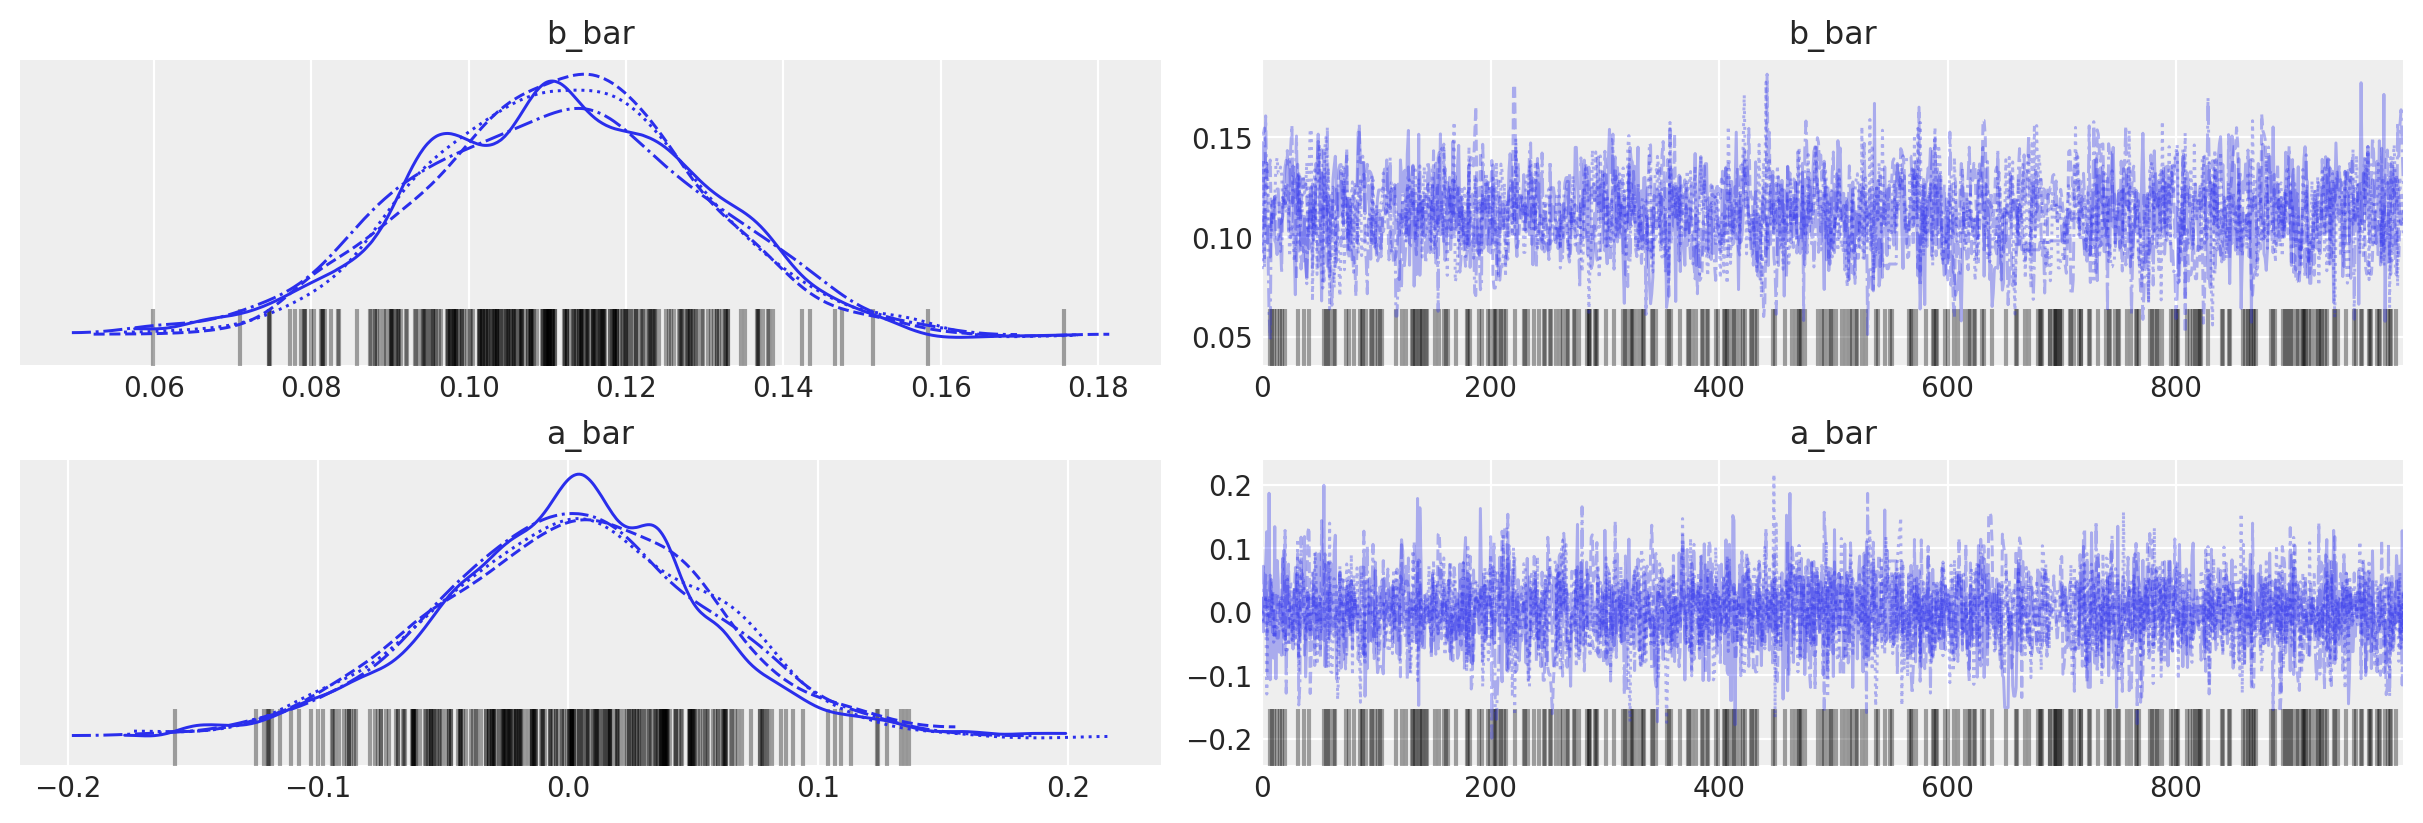

In [146]:
az.plot_trace(trace_1_2, var_names=["b_bar", "a_bar"])

In [12]:
code = pd.read_csv('./Abbott/FsTutorial_AnatomicalROI_FreeSurferColorLUT.csv')
code.head(10)

Unnamed: 0  struct_index                   struct_name    r    g    b  a
0           1             0                       Unknown    0    0    0  0
1           2             1        Left-Cerebral-Exterior   70  130  180  0
2           3             2    Left-Cerebral-White-Matter  245  245  245  0
3           4             3          Left-Cerebral-Cortex  205   62   78  0
4           5             4        Left-Lateral-Ventricle  120   18  134  0
5           6             5             Left-Inf-Lat-Vent  196   58  250  0
6           7             6      Left-Cerebellum-Exterior    0  148    0  0
7           8             7  Left-Cerebellum-White-Matter  220  248  164  0
8           9             8        Left-Cerebellum-Cortex  230  148   34  0
9          10             9                 Left-Thalamus    0  118   14  0

In [257]:
sbj=nmdata.sbj.astype(int).values
rgn=nmdata.rgn.astype(int).values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ef=ss.fit_transform(nmdata['Max_Intensity.1'].values.reshape(-1,1)).ravel()#remove extra bracket
vol=ss.fit_transform(nmdata['dvol'].values.reshape(-1,1)).ravel() #remove extra bracket
regionsize=ss.fit_transform(nmdata['volavbas'].values.reshape(-1,1)).ravel() #remove extra bracket
pulsen=ss.fit_transform(nmdata['pulsenumber'].values.reshape(-1,1)).ravel() #remove extra bracket
with pm.Model() as m_1_3:
    # hyper-priors
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    b_bar = pm.Normal("b_bar", 0.0, 1.5)
    r_bar = pm.Normal("r_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_b = pm.Exponential("sigma_b", 1.0)
    sigma_r = pm.Exponential("sigma_r", 1.0)
    
    c = pm.Normal("c", 0.0, 1.5)
    d = pm.Exponential("d", 1.0)
    sigma = pm.Exponential("sigma", 1)
    #sigma_=pm.Deterministic("sigma_", c + d * regionsize)
    sigma_ = pm.Exponential("sigma_", sigma, shape=Nregi)
    #sig = pm.Exponential("sigma", sigma_)
    # adaptive priors
    a = pm.Normal("a", a_bar, sigma_a, shape=Nsubj)
    b_bar=pm.Deterministic("b_bar", r)
    
    b = pm.Normal("b", b_bar, sigma_b, shape=Nsubj)
    r = pm.HalfNormal("r", r_bar, sigma_r, shape=Nregi)
    
    mu = pm.Deterministic("mu", a[sbj] + b[sbj] * ef)
    #mu = a[sbj] + b[sbj]*nmdata['Max_Intensity.1']
    V = pm.Normal("V", mu, sigma_[rgn], observed=vol)
    
    #trace_1_2 = pm.sample(tune=3000, target_accept=0.95, random_seed=RANDOM_SEED)
    trace_1_3 = pm.sample(random_seed=RANDOM_SEED)
    idata_1_3 = az.from_pymc3(trace_1_3)

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [r, b, a, sigma_, sigma, d, c, sigma_r, sigma_b, sigma_a, r_bar, b_bar, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
There were 122 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6739284474474696, but should be close to 0.8. Try to increase the number of tuning steps.
There were 324 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6652863696049796, but should be close to 0.8. Try to increase the number of tuning steps.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 113 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-package

In [325]:
nmdata_orig=nmdata
nmdata.columns

Index(['Unnamed: 0_x', 'Region', 'Ursi', 'Region_Label', 'Volume.2',
       'Average_Intensity.2', 'Max_Intensity.2', 'Volume.1',
       'Average_Intensity.1', 'Max_Intensity.1', 'Volume.3',
       'Average_Intensity.3', 'Max_Intensity.3', 'dvol3', 'dvol',
       'Unnamed: 0_y', 'id', 'cor', 'slope', 'inters', 'charge', 'pulsenumber',
       'pulsewidth', 'duration', 'eeg', 'freq', 'amp', 'sbj', 'volavbas',
       'rgn'],
      dtype='object')

In [364]:
np.where(nmdata_orig['freq']>=70)[0].shape

(1764,)

In [369]:
nmdata=nmdata_orig.iloc[np.where((nmdata_orig.volavbas>600) & (nmdata_orig['Max_Intensity.1']<200) & (nmdata_orig.freq>=40))[0]]

In [370]:
sbj=nmdata.sbj.astype(int).values
rgn=nmdata.rgn.astype(int).values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ef=ss.fit_transform(nmdata['Max_Intensity.1'].values.reshape(-1,1)).ravel()#remove extra bracket
vol=ss.fit_transform(nmdata['dvol'].values.reshape(-1,1)).ravel() #remove extra bracket
regionsize=ss.fit_transform(nmdata['volavbas'].values.reshape(-1,1)).ravel() #remove extra bracket
pulsen1=ss.fit_transform(nmdata['pulsenumber'].values.reshape(-1,1)).ravel() #remove extra bracket
with pm.Model() as m_1_4:
    # hyper-priors
    pulsen = pm.Data("pulsen", pulsen1)
    sigma = pm.Exponential("sigma", 1)
    #sigma_=pm.Deterministic("sigma_", c + d * regionsize)
    sigma_ = pm.Exponential("sigma_", sigma, shape=Nregi)
    #sig = pm.Exponential("sigma", sigma_)
    # adaptive priors
    
    eb = alef
    a = pm.Normal("a", 0, 1.5)
    b = pm.Normal("b", eb, sb)
    c = pm.Normal("c", 0, 1.0)
    d = pm.Normal("d", 0, 1.0)
    
    
    
    #mu = pm.Deterministic("mu", a + b * ef + c * pulsen + d * ef * pulsen)
    mu = a + b * ef + c * pulsen + d *ef * pulsen
    #mu = a[sbj] + b[sbj]*nmdata['Max_Intensity.1']
    V = pm.Normal("V", mu, sigma_[rgn], observed=vol)
    #V = pm.Normal("V", mu, sigma, observed=vol)
    
    #trace_1_2 = pm.sample(tune=3000, target_accept=0.95, random_seed=RANDOM_SEED)
    trace_1_4 = pm.sample(random_seed=RANDOM_SEED)
    idata_1_4 = az.from_pymc3(trace_1_4)

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [d, c, b, a, sigma_, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


In [371]:
res = az.summary(trace_1_4, round_to=2)
res

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
a           0.02  0.01     -0.00       0.04        0.0      0.0   6353.11   
b           0.14  0.02      0.12       0.17        0.0      0.0   5777.09   
c          -0.02  0.01     -0.04       0.00        0.0      0.0   6380.66   
d           0.04  0.02      0.01       0.06        0.0      0.0   5860.41   
sigma       1.06  0.12      0.88       1.24        0.0      0.0   6831.42   
...          ...   ...       ...        ...        ...      ...       ...   
sigma_[79]  1.04  0.11      0.87       1.21        0.0      0.0   7617.72   
sigma_[80]  0.80  0.10      0.64       0.94        0.0      0.0   9113.41   
sigma_[81]  1.01  0.12      0.83       1.18        0.0      0.0   7072.79   
sigma_[82]  1.11  0.12      0.92       1.30        0.0      0.0   7343.15   
sigma_[83]  2.52  0.26      2.12       2.91        0.0      0.0   7300.08   

            ess_tail  r_hat  
a            3092.83    1.0  
b            3284.66    1.0  
c            3029.98    1.0  
d            2757.44    1.0  
sigma        2734.13    1.0  
...              ...    ...  
sigma_[79]   2745.44    1.0  
sigma_[80]   3138.83    1.0  
sigma_[81]   2817.70    1.0  
sigma_[82]   2831.21    1.0  
sigma_[83]   2673.79    1.0  

[89 rows x 9 columns]

In [315]:
idata_1_4.constant_data['pulsen']

<xarray.DataArray 'pulsen' (pulsen_dim_0: 4284)>
array([-0.8038633 , -0.8038633 , -0.8038633 , ...,  1.24087626,
        1.24087626,  1.24087626])
Coordinates:
  * pulsen_dim_0  (pulsen_dim_0) int64 0 1 2 3 4 5 ... 4279 4280 4281 4282 4283

In [322]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import xarray as xr

m_quantiles = [0.025, 0.25, 0.5, 0.75, 0.975]
def make_scalarMap(m):
    return ScalarMappable(norm=Normalize(vmin=np.min(m), vmax=np.max(m)), cmap="viridis")

scalarMap = make_scalarMap(pulsen1)

def plot_data(x, moderator, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    else:
        fig = plt.gcf()

    h = ax.scatter(x, y, c=moderator, cmap=scalarMap.cmap)
    ax.set(xlabel="x", ylabel="y")
    # colourbar for moderator
    cbar = fig.colorbar(h)
    cbar.ax.set_ylabel("moderator")
    return ax

def posterior_prediction_plot(result, x, moderator, m_quantiles, ax=None):
    """Plot posterior predicted `y`"""
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    post = result.posterior.stack(sample=("chain", "draw"))
    xi = xr.DataArray(np.linspace(np.min(x), np.max(x), 20), dims=["x_plot"])
    m_levels = result.constant_data["pulsen"].quantile(m_quantiles).rename({"quantile": "m_level"})

    for p, m in zip(m_quantiles, m_levels):
        y = post.a + post.b * xi + post.d * xi * m + post.c * m
        region = y.quantile([0.025, 0.5, 0.975], dim="sample")
        ax.fill_between(
            xi,
            region.sel(quantile=0.025),
            region.sel(quantile=0.975),
            alpha=0.2,
            color=scalarMap.to_rgba(m),
            edgecolor="w",
        )
        ax.plot(
            xi,
            region.sel(quantile=0.5),
            color=scalarMap.to_rgba(m),
            linewidth=2,
            label=f"{p*100}th percentile of moderator",
        )

    ax.legend(fontsize=9)
    ax.set(xlabel="x", ylabel="y")
    return ax


/tmp/ipykernel_1544/287168485.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(h)


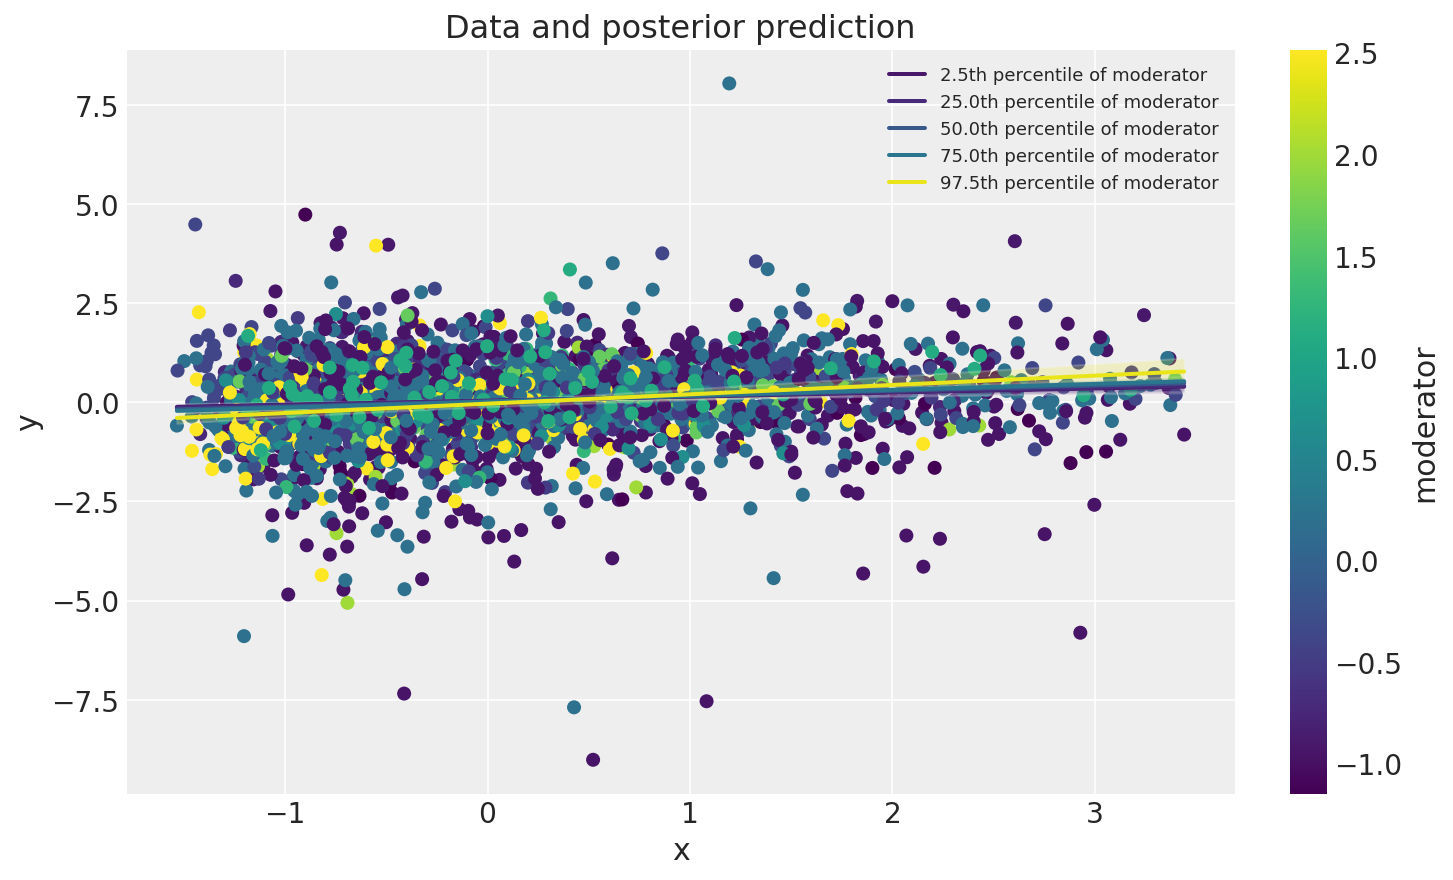

In [372]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_data(ef, pulsen1, vol, ax=ax)
posterior_prediction_plot(idata_1_4, ef, pulsen1, m_quantiles, ax=ax)
ax.set_title("Data and posterior prediction");

In [421]:
#nmdata=nmdata_orig.iloc[np.where((nmdata_orig.volavbas>600) & (nmdata_orig['Max_Intensity.1']<200) & (nmdata_orig.freq>=40))[0]]
nmdata=nmdata_orig.iloc[np.where((nmdata_orig.volavbas>600))]

In [452]:
sbj=nmdata.sbj.astype(int).values
rgn=nmdata.rgn.astype(int).values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ef=ss.fit_transform(nmdata['Max_Intensity.1'].values.reshape(-1,1)).ravel()#remove extra bracket
vol=ss.fit_transform(nmdata['dvol'].values.reshape(-1,1)).ravel() #remove extra bracket
regionsize=ss.fit_transform(nmdata['volavbas'].values.reshape(-1,1)).ravel() #remove extra bracket
pulsen1=ss.fit_transform(nmdata['pulsenumber'].values.reshape(-1,1)).ravel() #remove extra bracket
with pm.Model() as m_1_5:
    # hyper-priors
    pulsen = pm.Data("pulsen", pulsen1)
    sigma = pm.Exponential("sigma", 1)
    #sigma_=pm.Deterministic("sigma_", c + d * regionsize)
    #sigma_ = pm.Exponential("sigma_", sigma, shape=Nregi)
    #sig = pm.Exponential("sigma", sigma_)
    # adaptive priors
    mr = pm.Normal("mr",0,1.5)
    sr = pm.Exponential("sr",1)
    b1 = pm.Normal("b1", mr, sr, shape=Nregi)
    a1 = pm.Normal("a1", 0, 1)
    
    #smb = pm.Exponential("smb", 1)
    #mb = pm.Deterministic("mb", a1 + b1 * pulsen)
    #b = pm.Normal("b", mb, smb)
    b = a1 + b1[rgn] * pulsen
    a = pm.Normal("a", 0, 1.5)
    
    #c = pm.Normal("c", 0, 1.0)
    #d = pm.Normal("d", 0, 1.0)
    
    
    
    #mu = pm.Deterministic("mu", a + b * ef + c * pulsen + d * ef * pulsen)
    mu = a + b * ef
    #mu = a[sbj] + b[sbj]*nmdata['Max_Intensity.1']
    #V = pm.Normal("V", mu, sigma_[rgn], observed=vol)
    V = pm.Normal("V", mu, sigma, observed=vol)
    
    #trace_1_2 = pm.sample(tune=3000, target_accept=0.95, random_seed=RANDOM_SEED)
    trace_1_5 = pm.sample(random_seed=RANDOM_SEED)
    idata_1_5 = az.from_pymc3(trace_1_5)

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, a1, b1, sr, mr, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
There were 158 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.523193914709016, but should be close to 0.8. Try to increase the number of tuning steps.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6391635757181955, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


In [465]:
res = az.summary(trace_1_5, round_to=2)
res

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
mr      0.07  0.02      0.04       0.10       0.00      0.0     85.18   
b1[0]   0.07  0.07     -0.04       0.17       0.00      0.0    489.70   
b1[1]   0.10  0.06      0.01       0.20       0.00      0.0    590.20   
b1[2]   0.06  0.06     -0.03       0.15       0.00      0.0    321.88   
b1[3]   0.06  0.06     -0.04       0.15       0.00      0.0    137.04   
...      ...   ...       ...        ...        ...      ...       ...   
b1[83]  0.07  0.06     -0.02       0.17       0.00      0.0   1509.95   
a1      0.15  0.02      0.12       0.17       0.00      0.0    284.81   
a       0.01  0.02     -0.02       0.03       0.00      0.0     48.49   
sigma   0.99  0.01      0.97       1.00       0.00      0.0     33.78   
sr      0.06  0.03      0.01       0.09       0.01      0.0     12.06   

        ess_tail  r_hat  
mr        198.51   1.05  
b1[0]     945.80   1.02  
b1[1]     809.57   1.05  
b1[2]    1336.95   1.02  
b1[3]    1294.92   1.02  
...          ...    ...  
b1[83]   1326.70   1.05  
a1        183.82   1.02  
a        1118.02   1.06  
sigma     111.50   1.08  
sr          9.26   1.24  

[89 rows x 9 columns]

In [454]:
with m_1_5:
    ppc = pm.sample_posterior_predictive(
        trace_1_5, var_names=["a", "mr", "a1", "b1", "V"], random_seed=RANDOM_SEED
    )



In [502]:
rgn=nmdata.rgn.astype(int).values
rgn[74]

16

In [461]:
int_pp = (ppc["a1"]+ppc["b1"]*pulsen1[:, None]).T
k=int_pp.mean(1)
k.shape
np.unique(nmdata.sbj.iloc[np.where(nmdata.pulsenumber==nmdata.pulsenumber.max())])

ValueError: operands could not be broadcast together with shapes (4000,84) (4182,1) 

In [496]:
mreg=78
int_pp = (ppc["a1"]+ppc["b1"][:,mreg]*pulsen1[ix, None]).T
k=int_pp.mean(1)
res["mean"][0:80]

mr        0.07
b1[0]     0.07
b1[1]     0.10
b1[2]     0.06
b1[3]     0.06
          ... 
b1[74]    0.13
b1[75]    0.07
b1[76]    0.07
b1[77]    0.08
b1[78]    0.07
Name: mean, Length: 80, dtype: float64

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


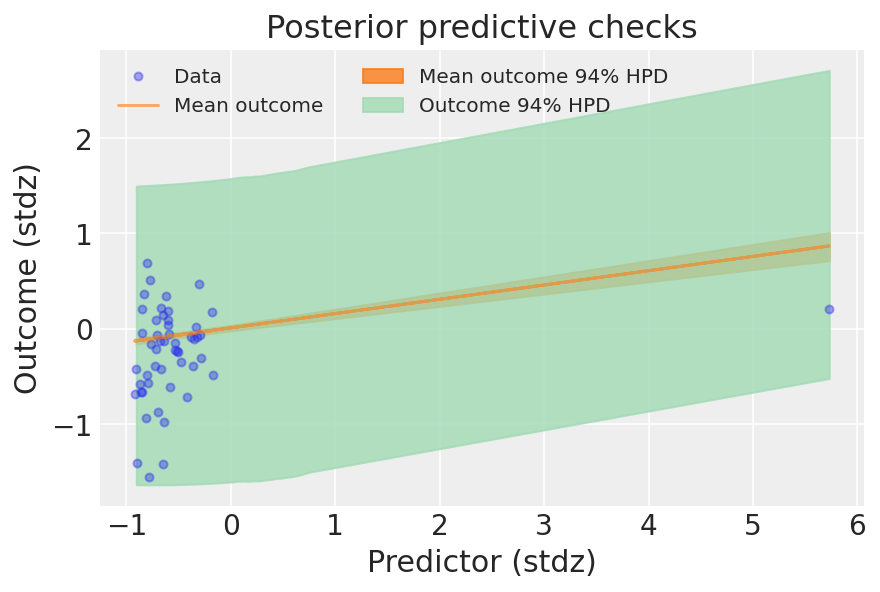

In [505]:
msbj=44
mreg=73
#ix = np.where(nmdata.sbj==msbj)[0]
ix = np.where(nmdata.rgn==rgn[mreg])[0]
int_pp = (ppc["a1"]+ppc["b1"][:,mreg]*pulsen1[ix, None]).T
k=int_pp.mean(1)
mu_pp = (ppc["a"] + k * ef[ix, None]).T

_, ax = plt.subplots()

ax.plot(ef[ix], vol[ix], "o", ms=4, alpha=0.4, label="Data")
ax.plot(ef[ix], mu_pp.mean(0), label="Mean outcome", alpha=0.6)
az.plot_hdi(
    ef[ix],
    mu_pp,
    ax=ax,
    fill_kwargs={"alpha": 0.8, "label": "Mean outcome 94% HPD"},
)
az.plot_hdi(
    ef[ix],
    ppc["V"][:,ix],
    ax=ax,
    fill_kwargs={"alpha": 0.8, "color": "#a1dab4", "label": "Outcome 94% HPD"},
)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Outcome (stdz)")
ax.set_title("Posterior predictive checks")
ax.legend(ncol=2, fontsize=10);

In [ ]:
#generalj adatot a modelbol es estimateld meg....

In [6]:
d = pd.read_csv("Data/reedfrogs.csv", sep=",")
print(d.shape)
d.head(10)

(48, 5)


density  pred   size  surv  propsurv
0       10    no    big     9       0.9
1       10    no    big    10       1.0
2       10    no    big     7       0.7
3       10    no    big    10       1.0
4       10    no  small     9       0.9
5       10    no  small     9       0.9
6       10    no  small    10       1.0
7       10    no  small     9       0.9
8       10  pred    big     4       0.4
9       10  pred    big     9       0.9

In [7]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [8]:
%qtconsole

#### Code 13.2

In [148]:
!pip install bokeh
from ipywidgets import interact
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pylab as plt

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, ColumnDataSource
import bokeh.palettes as bkpal

output_notebook()


     |████████████████████████████████| 18.5 MB 313 kB/s eta 0:00:01
     |████████████████████████████████| 661 kB 37.1 MB/s eta 0:00:01


Loading BokehJS ...

In [150]:


import numpy as np
import pymc3 as pm
import seaborn as sns
import scipy.stats as st
%matplotlib inline

nmax = 25
k, n = 7, 10
pv = np.linspace(0., 1., 50)
nv = np.arange(50)
pv_, nv_ = np.meshgrid(pv, nv)
ll = st.binom.pmf(k, nv_, pv_)



In [151]:
with pm.Model() as m:
    n = pm.DiscreteUniform('n', 0, 25)
    p = pm.Uniform('p', 0., 1., transform=None)
    y = pm.Binomial('k', n, p, observed=7)

In [190]:
m.logp({'n':20, 'p': 0.5})

array(-5.8627489)

/tmp/ipykernel_1544/1933930833.py:26: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


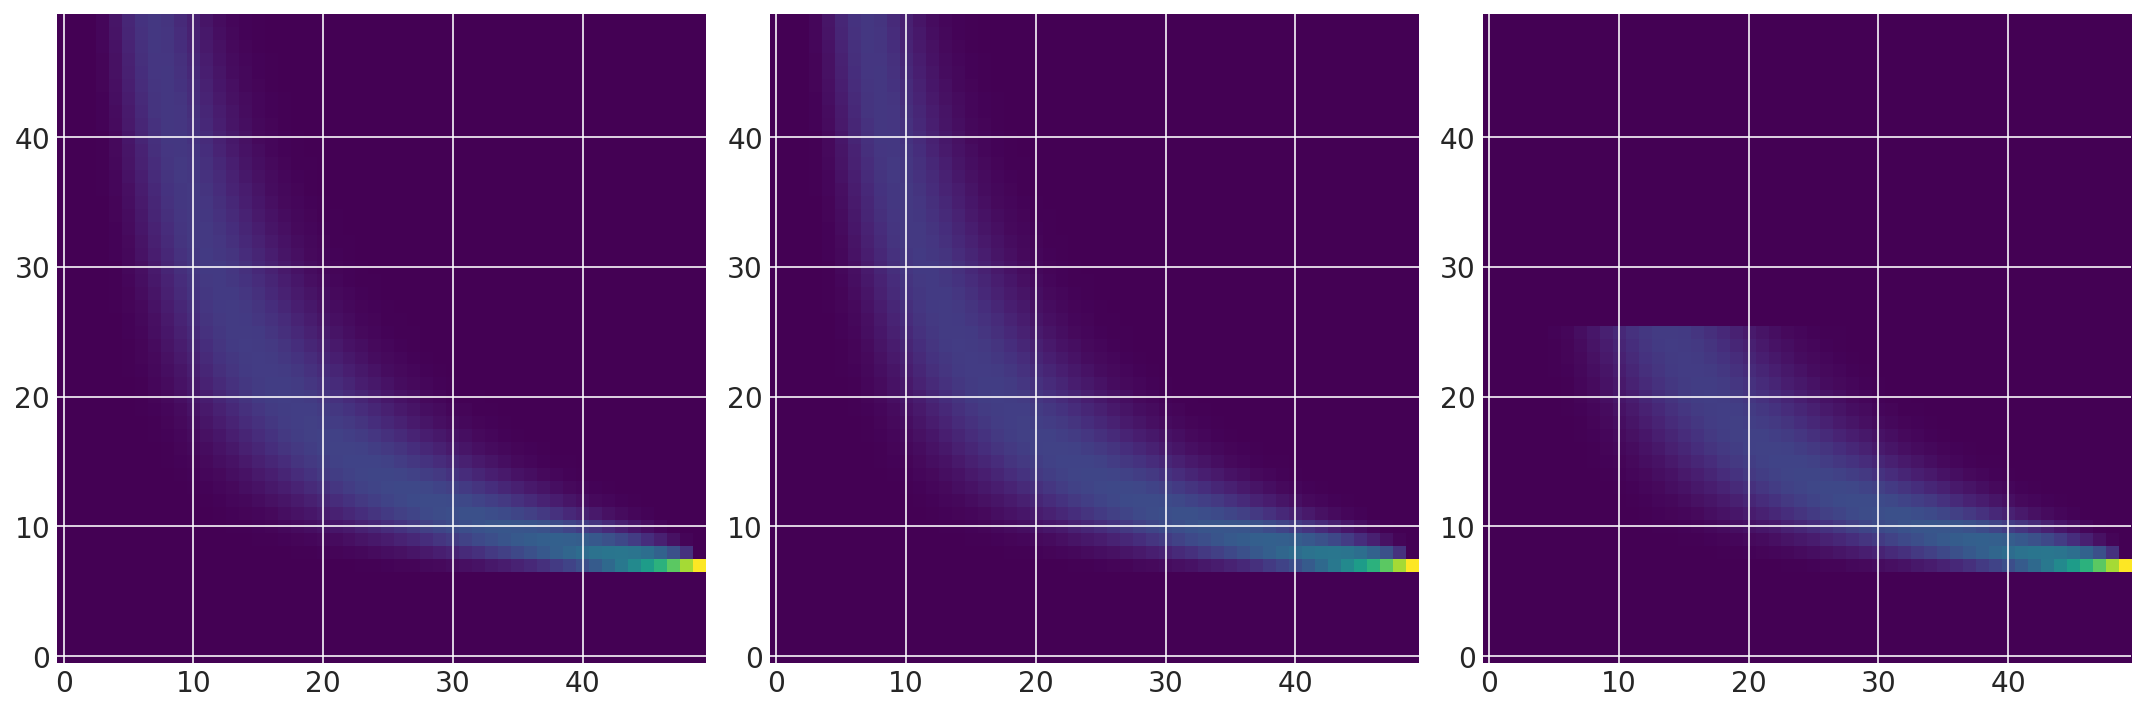

In [156]:
point=m.test_point


logp_m = m.logp
logp_y = y.logp



ll2 = np.zeros_like(ll)
lly = ll2.flatten()
llm = np.zeros_like(lly)

for i in range(len(lly)):
    point['n'] = nv_.flatten()[i]
    point['p'] = pv_.flatten()[i]
    llm[i] = np.exp(logp_m(point))
    lly[i] = np.exp(logp_y(point))
llm = llm.reshape(nv_.shape)
lly = lly.reshape(nv_.shape)

_, ax = plt.subplots(1, 3, figsize=(15, 5))
ll = st.binom.pmf(7, nv_, pv_)
ax[0].imshow(ll, origin='lower')
ax[1].imshow(lly, origin='lower')
ax[2].imshow(llm, origin='lower')
plt.tight_layout()
plt.show()


In [149]:


with pm.Model() as m2:
    n = pm.Uniform('n', 0, nmax)
    p = pm.Uniform('p', 0., 1.)
    y = pm.Binomial('k', n, p, observed=7)
#     tr = pm.sample(10000, tune=5000)
    tr = pm.sample(10000, step=pm.Metropolis())



NameError: name 'nmax' is not defined

In [9]:
# make the tank cluster variable
tank = np.arange(d.shape[0])
n_tanks = d.shape[0]

# fit
with pm.Model() as m_13_1:
    a = pm.Normal("a", 0, 1.5, shape=n_tanks)
    p = pm.math.invlogit(a[tank])

    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    trace_13_1 = pm.sample(random_seed=RANDOM_SEED)

az.summary(trace_13_1, round_to=2)

/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 125 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
a[0]   1.71  0.77      0.51       2.86       0.01     0.01   7715.46   
a[1]   2.41  0.90      0.96       3.77       0.01     0.01   9547.17   
a[2]   0.76  0.64     -0.20       1.82       0.01     0.01   7722.24   
a[3]   2.41  0.92      0.93       3.84       0.01     0.01   9145.78   
a[4]   1.72  0.76      0.57       2.98       0.01     0.01   7431.82   
a[5]   1.73  0.77      0.54       2.97       0.01     0.01   7341.99   
a[6]   2.39  0.89      1.01       3.82       0.01     0.01   7949.02   
a[7]   1.73  0.79      0.50       2.99       0.01     0.01   7392.57   
a[8]  -0.37  0.61     -1.34       0.60       0.01     0.01   8158.28   
a[9]   1.71  0.75      0.50       2.85       0.01     0.01   8024.70   
a[10]  0.76  0.66     -0.25       1.82       0.01     0.01   8277.78   
a[11]  0.38  0.61     -0.56       1.40       0.01     0.01   8187.50   
a[12]  0.75  0.64     -0.24       1.80       0.01     0.01   9685.93   
a[13] -0.00  0.62     -0.99       0.99       0.01     0.01   9326.27   
a[14]  1.72  0.79      0.48       2.98       0.01     0.01  10298.30   
a[15]  1.73  0.78      0.42       2.89       0.01     0.01   9156.59   
a[16]  2.54  0.67      1.39       3.48       0.01     0.01   9942.24   
a[17]  2.15  0.61      1.18       3.06       0.01     0.01   8489.94   
a[18]  1.81  0.56      0.89       2.65       0.01     0.00   9851.31   
a[19]  3.09  0.80      1.89       4.39       0.01     0.01   8354.17   
a[20]  2.13  0.59      1.15       3.02       0.01     0.01   8260.74   
a[21]  2.13  0.61      1.16       3.08       0.01     0.01   9588.01   
a[22]  2.15  0.59      1.19       3.06       0.01     0.01  11380.02   
a[23]  1.54  0.51      0.74       2.36       0.01     0.00  10842.93   
a[24] -1.10  0.45     -1.82      -0.38       0.00     0.00   9243.75   
a[25]  0.08  0.40     -0.57       0.70       0.00     0.01   8787.40   
a[26] -1.55  0.50     -2.31      -0.75       0.01     0.00   7598.42   
a[27] -0.56  0.42     -1.21       0.13       0.00     0.00   9493.20   
a[28]  0.08  0.41     -0.60       0.69       0.00     0.01   9312.88   
a[29]  1.31  0.46      0.58       2.03       0.01     0.00   9265.53   
a[30] -0.72  0.41     -1.37      -0.06       0.00     0.00   8757.89   
a[31] -0.39  0.41     -1.03       0.29       0.00     0.01   7960.90   
a[32]  2.85  0.67      1.74       3.84       0.01     0.01   8670.38   
a[33]  2.46  0.57      1.51       3.32       0.01     0.01   7478.15   
a[34]  2.45  0.59      1.49       3.31       0.01     0.00   9995.27   
a[35]  1.91  0.49      1.11       2.65       0.01     0.00   8268.06   
a[36]  1.91  0.48      1.16       2.66       0.01     0.00   9019.10   
a[37]  3.35  0.76      2.11       4.51       0.01     0.01   8122.54   
a[38]  2.45  0.57      1.56       3.31       0.01     0.01   7540.66   
a[39]  2.17  0.54      1.30       3.01       0.01     0.01   7529.37   
a[40] -1.90  0.48     -2.62      -1.13       0.01     0.00   8321.03   
a[41] -0.64  0.34     -1.19      -0.09       0.00     0.00   8255.46   
a[42] -0.51  0.34     -1.07       0.01       0.00     0.00   8572.06   
a[43] -0.40  0.34     -0.98       0.10       0.00     0.00   9504.00   
a[44]  0.52  0.35     -0.01       1.09       0.00     0.00   8511.07   
a[45] -0.62  0.35     -1.18      -0.07       0.00     0.00  10323.93   
a[46]  1.90  0.48      1.13       2.63       0.01     0.00   8556.20   
a[47] -0.05  0.34     -0.61       0.48       0.00     0.01  10311.50   

       ess_tail  r_hat  
a[0]    2887.82   1.00  
a[1]    2705.02   1.00  
a[2]    2802.72   1.00  
a[3]    2824.63   1.00  
a[4]    2925.48   1.00  
a[5]    2886.17   1.00  
a[6]    2718.62   1.00  
a[7]    2802.60   1.00  
a[8]    2824.60   1.00  
a[9]    3011.25   1.00  
a[10]   2826.18   1.00  
a[11]   2682.09   1.00  
a[12]   2989.94   1.00  
a[13]   2837.59   1.00  
a[14]   2712.08   1.00  
a[15]   2766.33   1.00  
a[16]   2766.52   1.00  
a[17]   2890.88   1.00  
a[1

#### Code 13.3

In [13]:
with pm.Model() as m_13_2:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma = pm.Exponential("sigma", 1.0)

    a = pm.Normal("a", a_bar, sigma, shape=n_tanks)
    p = pm.math.invlogit(a[tank])

    S = pm.Binomial("S", n=d.density, p=p, observed=d.surv)
    trace_13_2 = pm.sample(random_seed=RANDOM_SEED)

/opt/miniconda-latest/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, sigma, a_bar]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


#### Code 13.4

In [14]:
az.compare({"m13_1": trace_13_1, "m13_2": trace_13_2})

/opt/miniconda-latest/lib/python3.7/site-packages/arviz/stats/stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  "The default method used to estimate the weights for each model,"
/opt/miniconda-latest/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/opt/miniconda-latest/lib/python3.7/site-packages/arviz/stats/stats.py:1407: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
/opt/miniconda-latest/lib/python3.7/site-pa

rank        waic     p_waic     d_waic  weight        se       dse  \
m13_2     0  201.065328  21.485242   0.000000     1.0  7.053256  0.000000   
m13_1     1  214.245063  25.399350  13.179735     0.0  4.750226  3.355971   

       warning waic_scale  
m13_2     True   deviance  
m13_1     True   deviance

#### Code 13.5

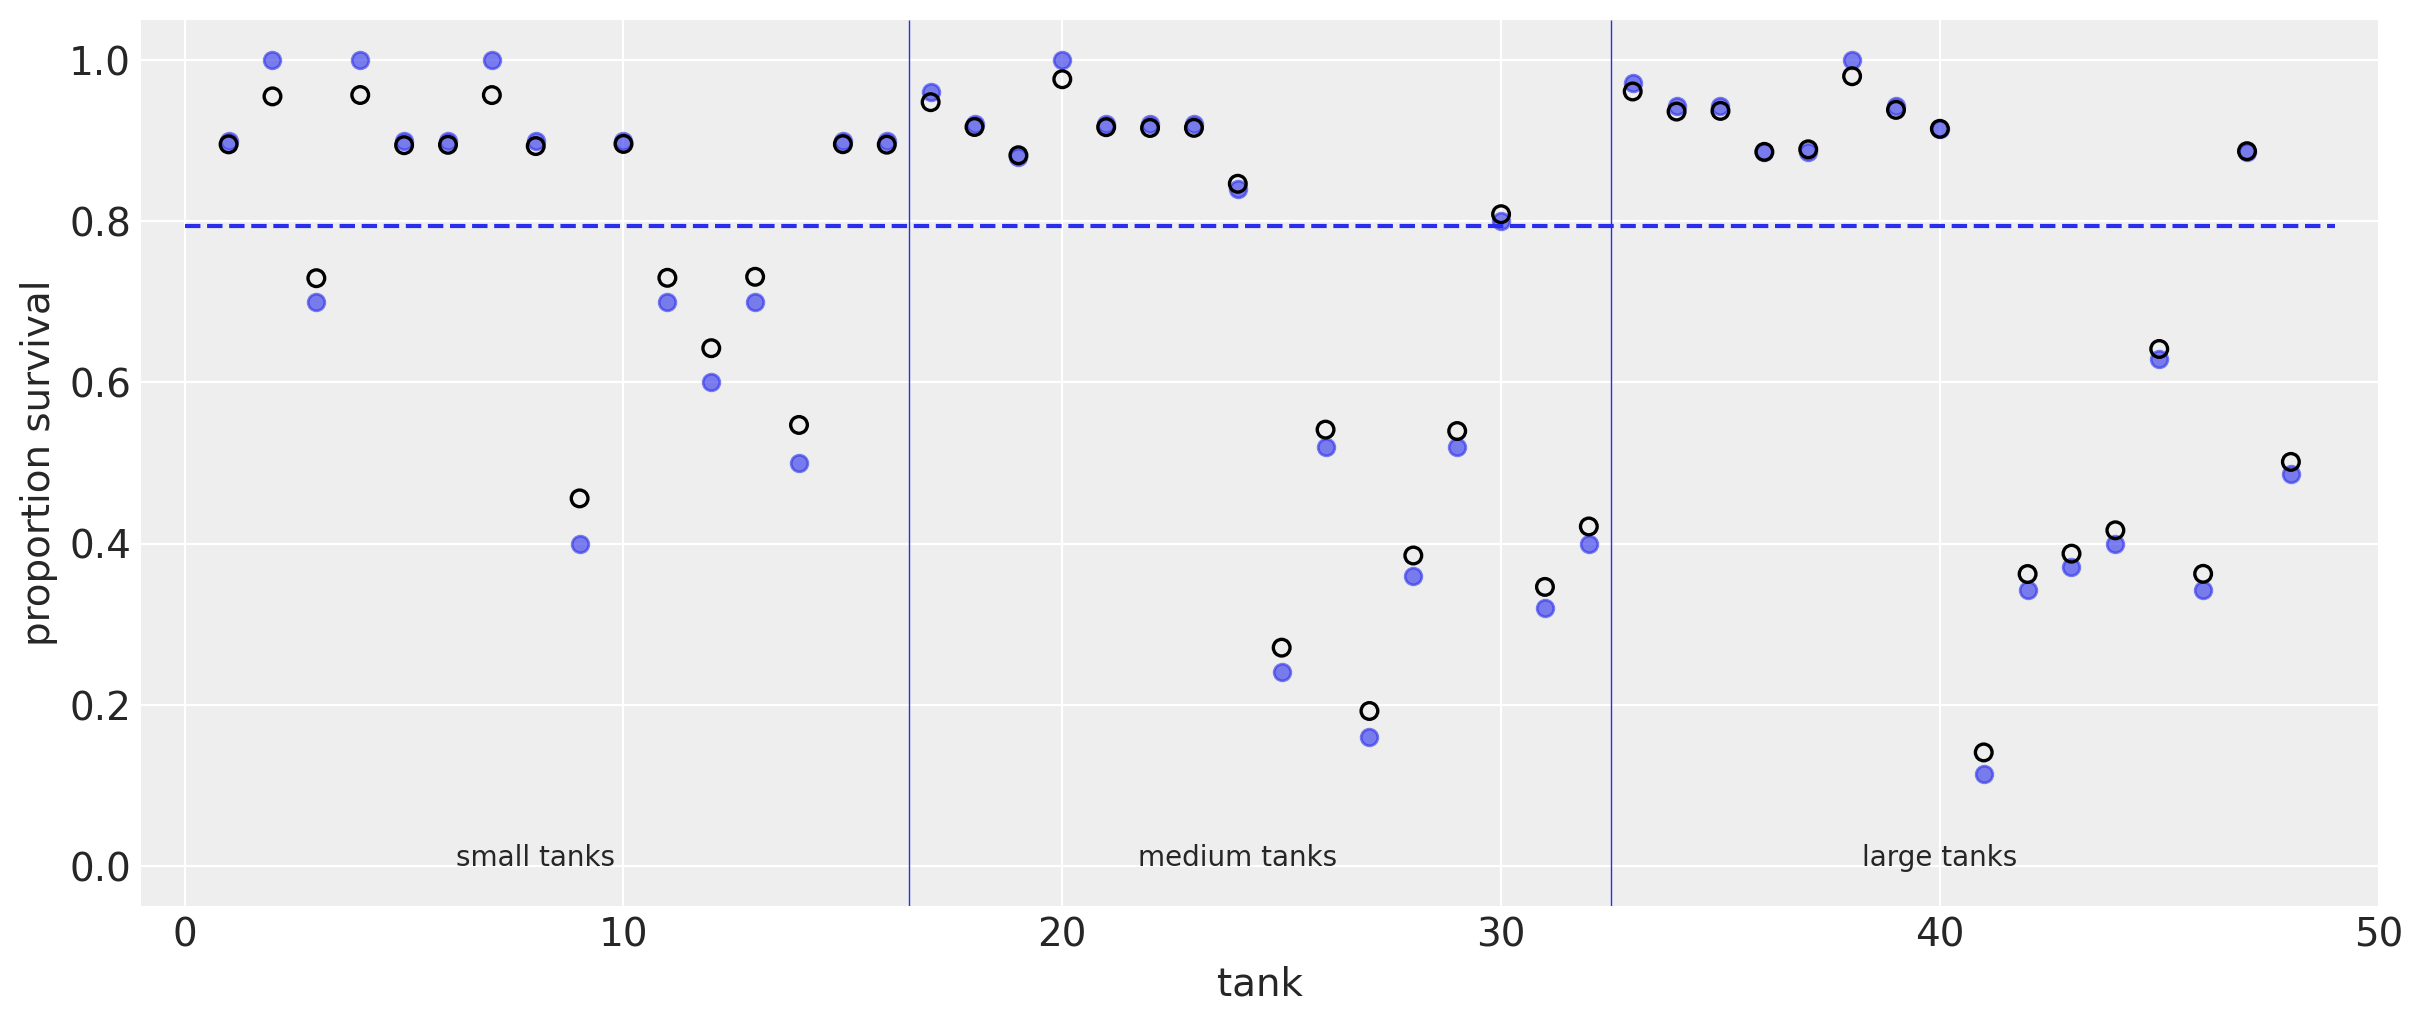

In [15]:
# compute mean intercept for each tank
# also transform to probability with logistic
propsurv_est = logistic(trace_13_2["a"].mean(0))

_, ax = plt.subplots(1, 1, figsize=(12, 5))

# display raw proportions surviving in each tank
ax.scatter(np.arange(1, 49), d.propsurv, alpha=0.6)

# overlay posterior means
ax.scatter(np.arange(1, 49), propsurv_est, facecolors="none", edgecolors="k", lw=1.2)

# mark posterior mean probability across tanks
ax.hlines(logistic(trace_13_2["a_bar"].mean()), 0, 49, linestyles="--")

# draw vertical dividers between tank densities
ax.vlines([16.5, 32.5], -0.05, 1.05, lw=0.5)
ax.text(8, 0, "small tanks", horizontalalignment="center")
ax.text(16 + 8, 0, "medium tanks", horizontalalignment="center")
ax.text(32 + 8, 0, "large tanks", horizontalalignment="center")

ax.set_xlabel("tank", fontsize=14)
ax.set_ylabel("proportion survival", fontsize=14)
ax.set_xlim(-1, 50)
ax.set_ylim(-0.05, 1.05);

#### Code 13.6

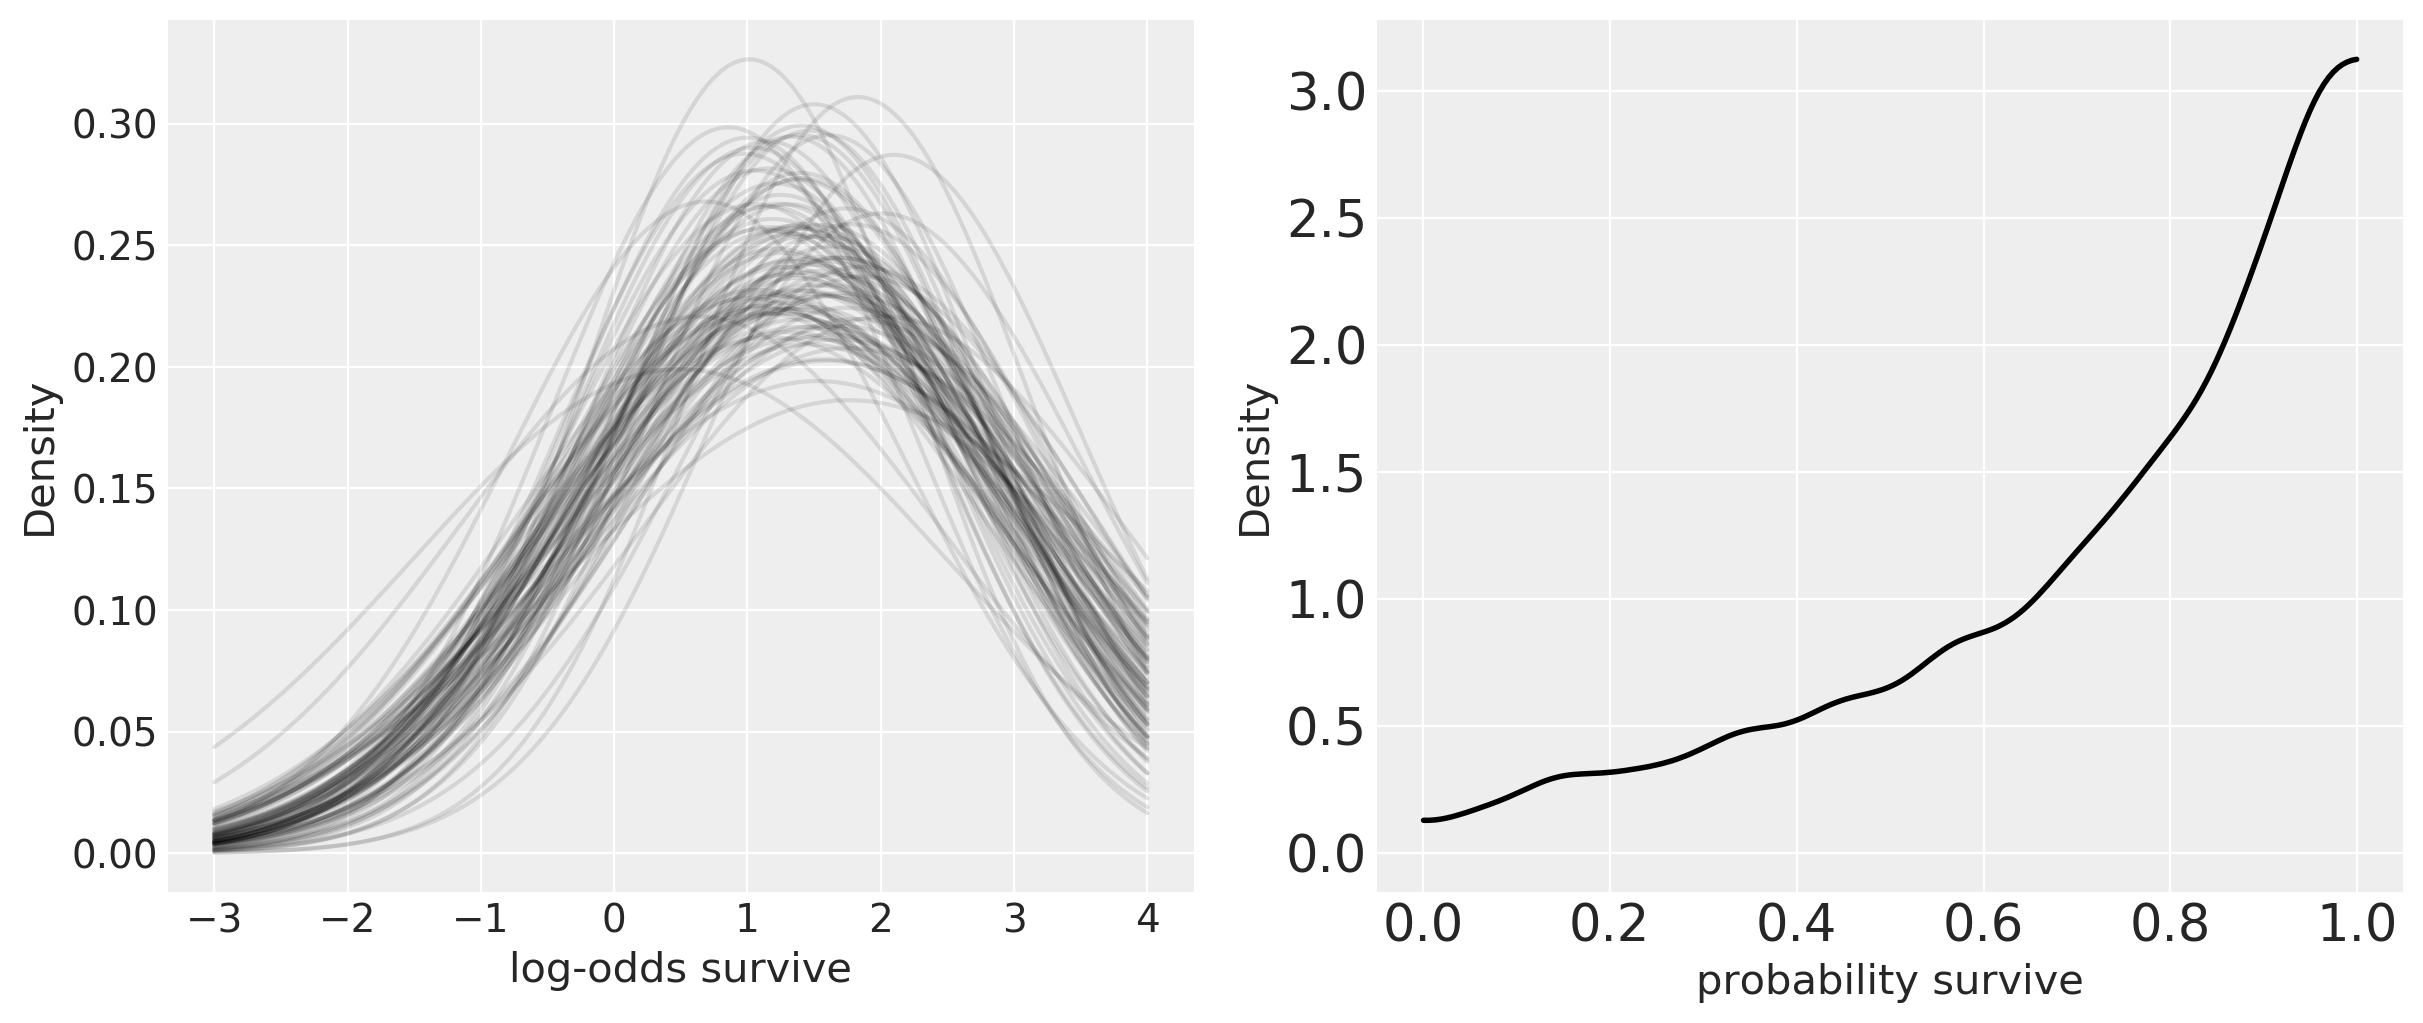

In [8]:
_, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# show first 100 populations in the posterior
xrange = np.linspace(-3, 4, 200)
postcurve = [
    stats.norm.pdf(xrange, loc=trace_13_2["a_bar"][i], scale=trace_13_2["sigma"][i])
    for i in range(100)
]
ax[0].plot(xrange, np.asarray(postcurve).T, alpha=0.1, color="k")
ax[0].set_xlabel("log-odds survive")
ax[0].set_ylabel("Density")

# sample 8000 imaginary tanks from the posterior distribution
sim_tanks = np.random.normal(loc=trace_13_2["a_bar"], scale=trace_13_2["sigma"])

# transform to probability and visualize
az.plot_kde(logistic(sim_tanks), ax=ax[1], plot_kwargs={"color": "k"})
ax[1].set_xlabel("probability survive")
ax[1].set_ylabel("Density");

#### Code 13.7

In [9]:
a_bar, sigma, nponds = 1.5, 1.5, 60
Ni = np.repeat([5, 10, 25, 35], 15)

#### Code 13.8

In [10]:
a_pond = np.random.normal(loc=a_bar, scale=sigma, size=nponds)

#### Code 13.9

In [11]:
dsim = pd.DataFrame(dict(pond=np.arange(nponds), Ni=Ni, true_a=a_pond))
dsim.head()

pond  Ni    true_a
0     0   5  2.171878
1     1   5 -0.355311
2     2   5  2.992474
3     3   5  2.133112
4     4   5  0.401375

#### Code 13.10
Data types related. Python is dynamically-typed.

#### Code 13.11

In [12]:
dsim["Si"] = np.random.binomial(dsim["Ni"], logistic(dsim["true_a"]))

#### Code 13.12

In [13]:
dsim["p_nopool"] = dsim.Si / dsim.Ni

#### Code 13.13

In [14]:
with pm.Model() as m_13_3:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma = pm.Exponential("sigma", 1.0)

    a_pond = pm.Normal("a_pond", a_bar, sigma, shape=nponds)
    p = pm.math.invlogit(a_pond[dsim.pond.values])

    Si = pm.Binomial("Si", n=dsim.Ni.values, p=p, observed=dsim.Si)
    trace_13_3 = pm.sample(random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_pond, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


#### Code 13.14

In [15]:
az.summary(trace_13_3, var_names=["a_bar", "sigma"], round_to=2)

mean    sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
a_bar  1.51  0.21      1.17       1.86        0.0      0.0   3968.14  3783.14   
sigma  1.42  0.20      1.13       1.76        0.0      0.0   1688.99  1688.99   

       ess_bulk  ess_tail  r_hat  
a_bar   3998.70   3244.93    1.0  
sigma   1701.77   2323.98    1.0

#### Code 13.15

In [16]:
dsim["p_partpool"] = logistic(trace_13_3["a_pond"].mean(0))

#### Code 13.16

In [17]:
dsim["p_true"] = logistic(dsim["true_a"].values)

#### Code 13.17

In [18]:
nopool_error = np.abs(dsim.p_nopool - dsim.p_true)
partpool_error = np.abs(dsim.p_partpool - dsim.p_true)

#### Code 13.18 and 13.19

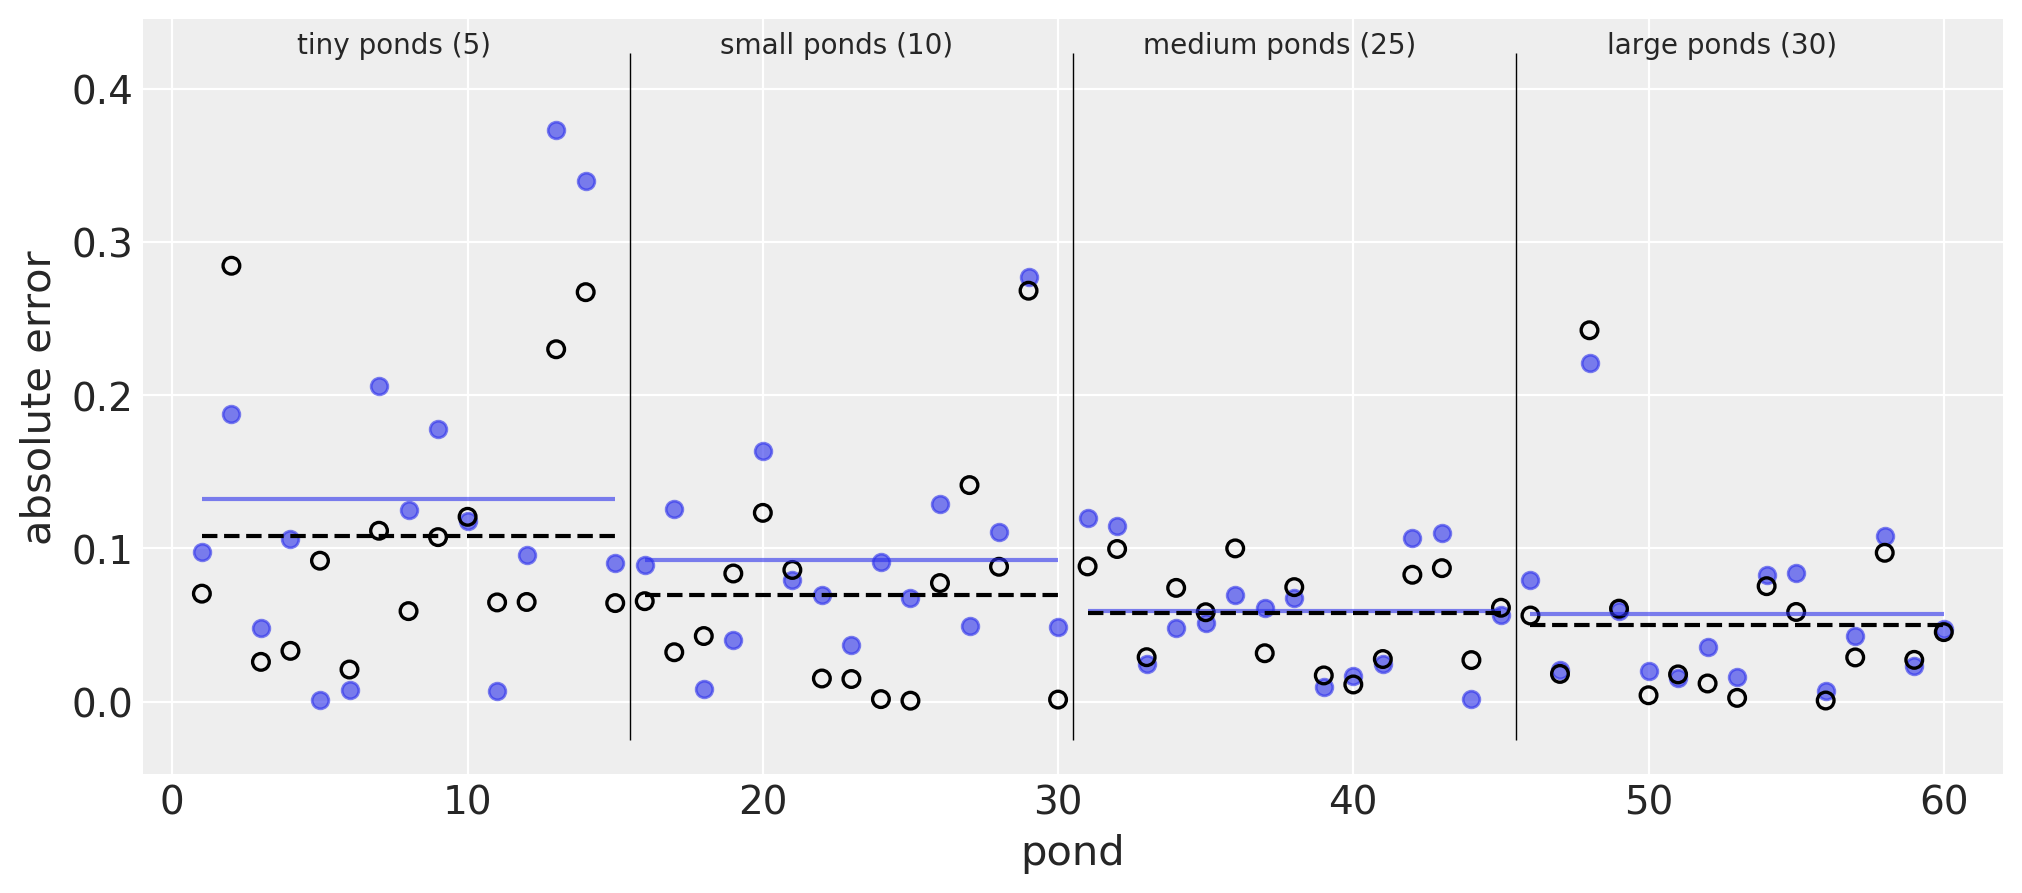

In [19]:
_, ax = plt.subplots(1, 1, figsize=(12, 5))
xrange = np.arange(60)
xrange_ = xrange.reshape((4, 15))

ax.scatter(xrange + 1, nopool_error, alpha=0.6)
ax.scatter(xrange + 1, partpool_error, facecolors="none", edgecolors="k", lw=1.2)
ax.vlines(xrange_[1:, 0] + 0.5, -0.025, max(nopool_error) + 0.05, lw=0.5)

textall = [
    "tiny ponds (5)",
    "small ponds (10)",
    "medium ponds (25)",
    "large ponds (30)",
]
for isem in range(4):
    ax.hlines(
        nopool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="C0",
        alpha=0.6,
    )
    ax.hlines(
        partpool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="k",
        linestyles="--",
    )
    ax.text(
        xrange_[isem, 7] + 0.5,
        max(nopool_error) + 0.05,
        textall[isem],
        horizontalalignment="center",
    )

ax.set_xlabel("pond")
ax.set_ylabel("absolute error")
ax.set_xlim(-1, 62);

#### Code 13.20

This part is Stan related. To do the same in PyMC3 (i.e., avoid compiling the same model twice), you need to set up the input data with `pm.Data`. There are examples in this repository, and you can also take a look at [this tutorial](https://docs.pymc.io/notebooks/data_container.html)

#### Code 13.21

In [20]:
d = pd.read_csv("Data/chimpanzees.csv", sep=";")

treatment = (d.prosoc_left + 2 * d.condition).values
Ntreatments = len(np.unique(treatment))

actor = (d.actor - 1).astype(int).values
Nactor = len(np.unique(actor))

block = (d.block - 1).astype(int).values
Nblock = len(np.unique(block))

with pm.Model() as m_13_4:
    # hyper-priors
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    # adaptive priors
    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    g = pm.Normal("g", 0.0, sigma_g, shape=Nblock)

    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)
    p = pm.math.invlogit(a[actor] + g[block] + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_4 = pm.sample(tune=3000, target_accept=0.95, random_seed=RANDOM_SEED)
    idata_13_4 = az.from_pymc3(trace_13_4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 22 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9011254649531759, but should be close to 0.95. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


#### Code 13.22

In [21]:
az.summary(idata_13_4, round_to=2)

mean    sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a_bar    0.61  0.73     -0.56       1.74       0.02     0.01   1487.34   
a[0]    -0.34  0.35     -0.91       0.20       0.01     0.01   1124.27   
a[1]     4.72  1.32      2.87       6.60       0.04     0.03   1217.89   
a[2]    -0.64  0.36     -1.23      -0.11       0.01     0.01   1129.29   
a[3]    -0.64  0.36     -1.21      -0.06       0.01     0.01   1002.19   
a[4]    -0.34  0.36     -0.87       0.26       0.01     0.01   1074.80   
a[5]     0.60  0.36      0.03       1.15       0.01     0.01   1093.27   
a[6]     2.13  0.44      1.46       2.84       0.01     0.01   1489.88   
g[0]    -0.16  0.22     -0.49       0.13       0.01     0.01    930.54   
g[1]     0.04  0.18     -0.23       0.31       0.00     0.00   1733.16   
g[2]     0.05  0.18     -0.22       0.33       0.00     0.01   1543.75   
g[3]     0.01  0.18     -0.26       0.29       0.00     0.00   1993.55   
g[4]    -0.03  0.18     -0.31       0.25       0.00     0.00   1855.21   
g[5]     0.11  0.20     -0.15       0.43       0.01     0.01   1029.20   
b[0]    -0.15  0.29     -0.63       0.30       0.01     0.01   1016.92   
b[1]     0.38  0.30     -0.10       0.86       0.01     0.01    928.04   
b[2]    -0.50  0.29     -0.93      -0.01       0.01     0.01    903.34   
b[3]     0.26  0.29     -0.22       0.71       0.01     0.01   1038.74   
sigma_a  2.02  0.65      1.09       2.93       0.02     0.01   1495.40   
sigma_g  0.21  0.17      0.01       0.40       0.01     0.01    367.34   

          ess_sd  ess_bulk  ess_tail  r_hat  
a_bar    1487.34   1440.20   2154.06   1.00  
a[0]     1124.27   1124.65   1795.98   1.00  
a[1]     1107.96   1504.15   1253.72   1.00  
a[2]     1129.29   1136.58   1691.75   1.00  
a[3]     1002.19    995.10   1983.85   1.00  
a[4]     1074.80   1072.57   2104.52   1.00  
a[5]     1093.27   1093.82   1782.13   1.00  
a[6]     1489.88   1488.86   2142.14   1.00  
g[0]      846.84   1068.90   1693.56   1.00  
g[1]      847.02   2321.42   1291.49   1.00  
g[2]      625.62   1938.94   1304.54   1.01  
g[3]      824.99   2426.79   1543.61   1.01  
g[4]      828.12   2126.58   1564.91   1.01  
g[5]      664.56   1417.76   1190.84   1.00  
b[0]     1016.92   1019.89   1892.62   1.00  
b[1]      928.04    921.58   1162.97   1.01  
b[2]      903.34    900.94   1633.42   1.01  
b[3]     1038.74   1036.54   1692.54   1.00  
sigma_a  1495.40   1550.83   2242.50   1.00  
sigma_g   367.34    279.72    531.77   1.02

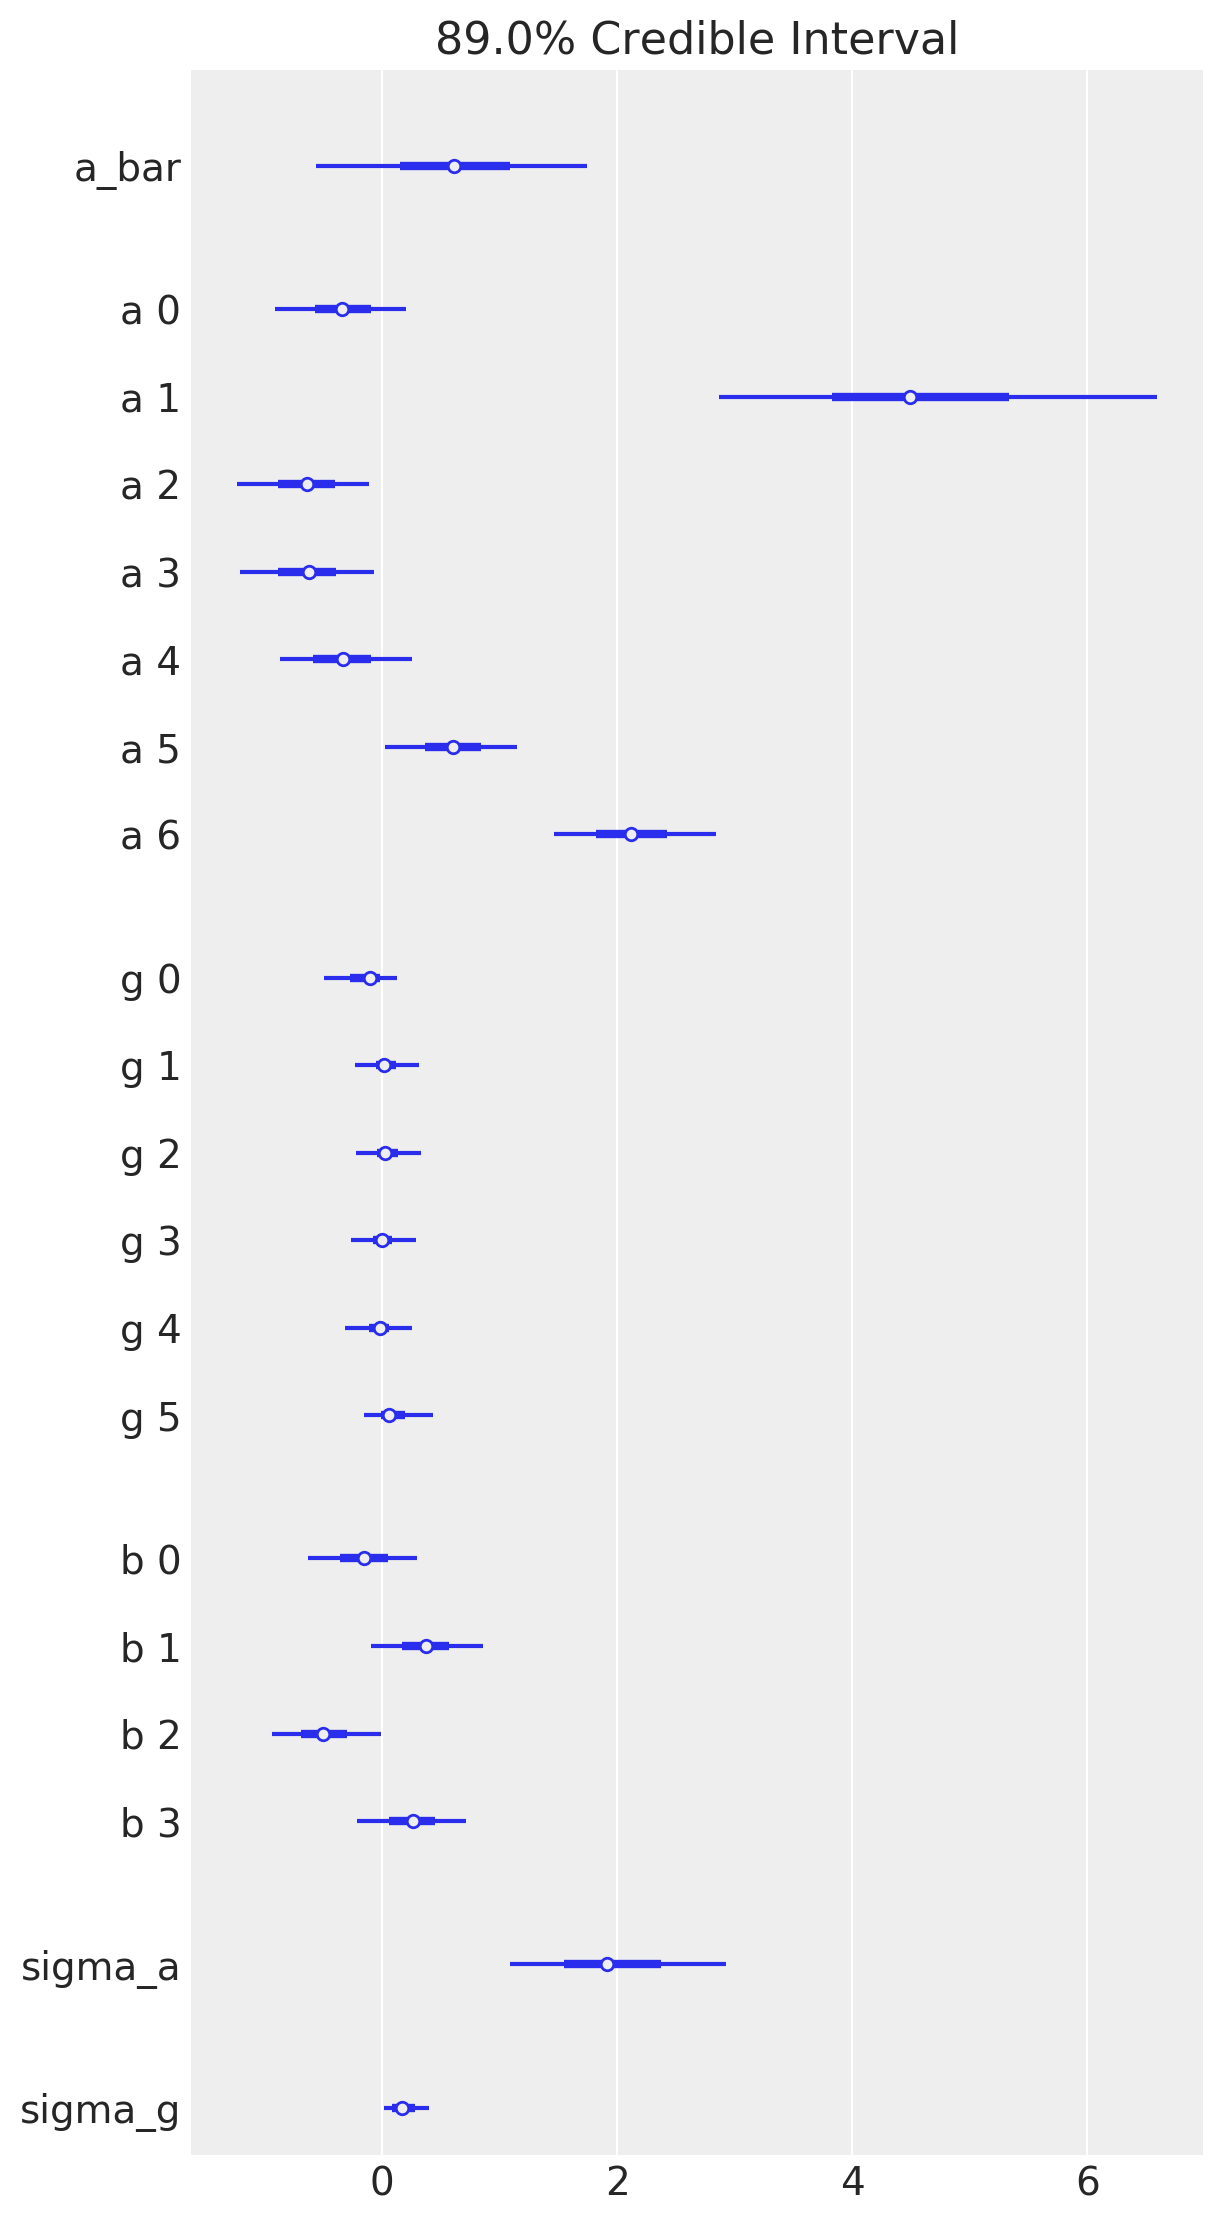

In [22]:
az.plot_forest(idata_13_4, combined=True);

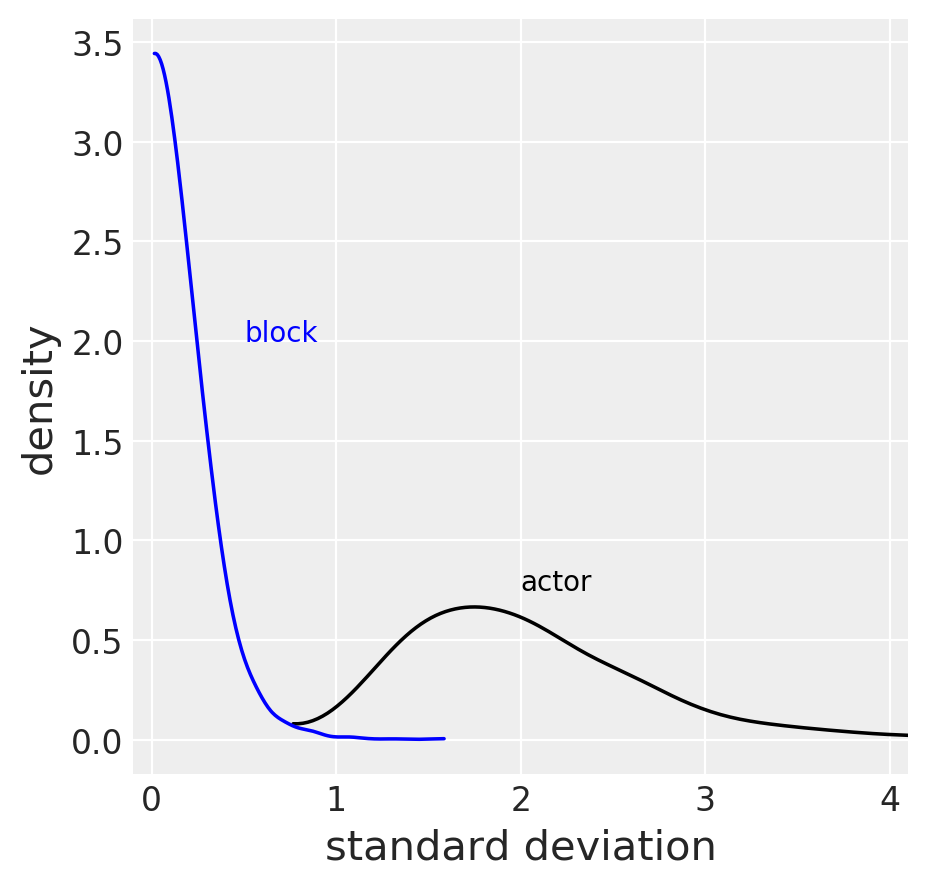

In [23]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))

az.plot_kde(idata_13_4.posterior["sigma_a"], ax=ax, plot_kwargs={"color": "black"})
az.plot_kde(idata_13_4.posterior["sigma_g"], ax=ax, plot_kwargs={"color": "blue"})

ax.text(2, 0.75, "actor", color="black")
ax.text(0.5, 2, "block", color="blue")
ax.set_xlabel("standard deviation")
ax.set_ylabel("density")
ax.set_xlim(-0.1, 4.1);

#### Code 13.23

In [24]:
with pm.Model() as m_13_5:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)

    p = pm.math.invlogit(a[actor] + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_5 = pm.sample(random_seed=RANDOM_SEED)
    idata_13_5 = az.from_pymc3(trace_13_5)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a, sigma_a, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 97 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6908008384246643, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


#### Code 13.24

In [25]:
az.compare({"m_13_4": idata_13_4, "m_13_5": idata_13_5})

rank     waic   p_waic   d_waic    weight       se      dse warning  \
m_13_5    0  530.863  8.43221        0  0.672904  18.3992        0   False   
m_13_4    1  532.449  10.7065  1.58552  0.327096   18.393  1.61278   False   

       waic_scale  
m_13_5   deviance  
m_13_4   deviance

#### Code 13.25

In [26]:
with pm.Model() as m_13_6:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)
    sigma_b = pm.Exponential("sigma_b", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    g = pm.Normal("g", 0.0, sigma_g, shape=Nblock)
    b = pm.Normal("b", 0.0, sigma_b, shape=Ntreatments)

    p = pm.math.invlogit(a[actor] + g[block] + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_6 = pm.sample(tune=2000, target_accept=0.95, random_seed=RANDOM_SEED)
    idata_13_6 = az.from_pymc3(trace_13_6)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_b, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 21 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [27]:
m13_4 = az.summary(idata_13_4, var_names=["b"], kind="stats", round_to=2)["mean"]
m13_4.name = "m13_4"
m13_6 = az.summary(idata_13_6, var_names=["b"], kind="stats", round_to=2)["mean"]
m13_6.name = "m13_6"
pd.concat([m13_4, m13_6], axis=1)

m13_4  m13_6
b[0]  -0.15  -0.12
b[1]   0.38   0.36
b[2]  -0.50  -0.44
b[3]   0.26   0.26

#### Code 13.26

In [28]:
with pm.Model() as m_13_7:
    v = pm.Normal("v", 0.0, 3.0)
    x = pm.Normal("x", 0.0, pm.math.exp(v))

    trace_13_7 = pm.sample(random_seed=RANDOM_SEED)
    idata_13_7 = az.from_pymc3(trace_13_7)
az.summary(idata_13_7, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
There were 285 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.38402414793118334, but should be close to 0.8. Try to increase the number of tuning steps.
There were 273 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5236870093086058, but should be close to 0.8. Try to increase the number of tuning steps.
There were 373 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4149833310077266, but should be close to 0.8. Try to increase the number of tuning steps.
There were 286 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4484671380347144, but should be close 

mean      sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
v   3.00    1.72     -0.18       5.18       0.50     0.36     12.02   12.02   
x -10.31  169.77   -130.96     128.02      10.22     7.24    275.77  275.77   

   ess_bulk  ess_tail  r_hat  
v     11.53     11.79   1.27  
x    370.66    267.49   1.18

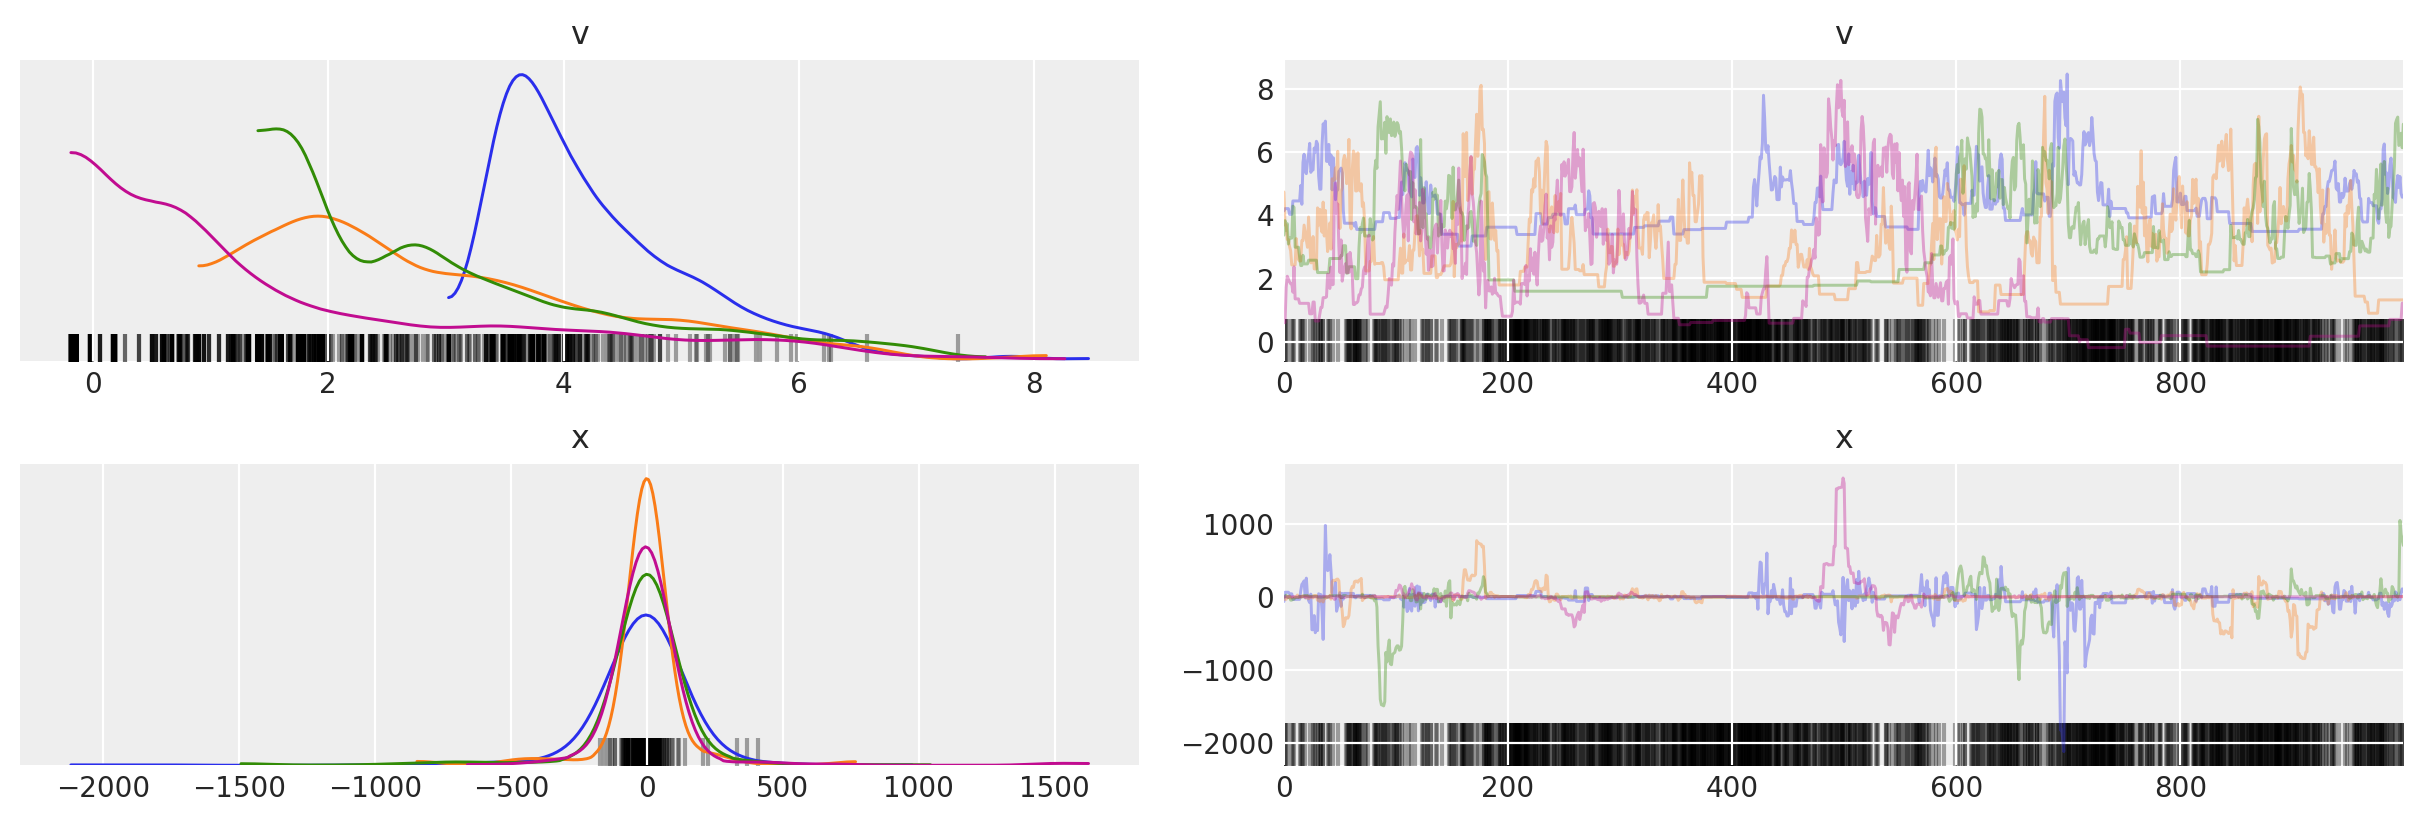

In [29]:
az.plot_trace(idata_13_7);

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/plots/pairplot.py:167: UserWarning: fill_last and contour will be deprecated. Please use kde_kwargs
  "fill_last and contour will be deprecated. Please use kde_kwargs", UserWarning,


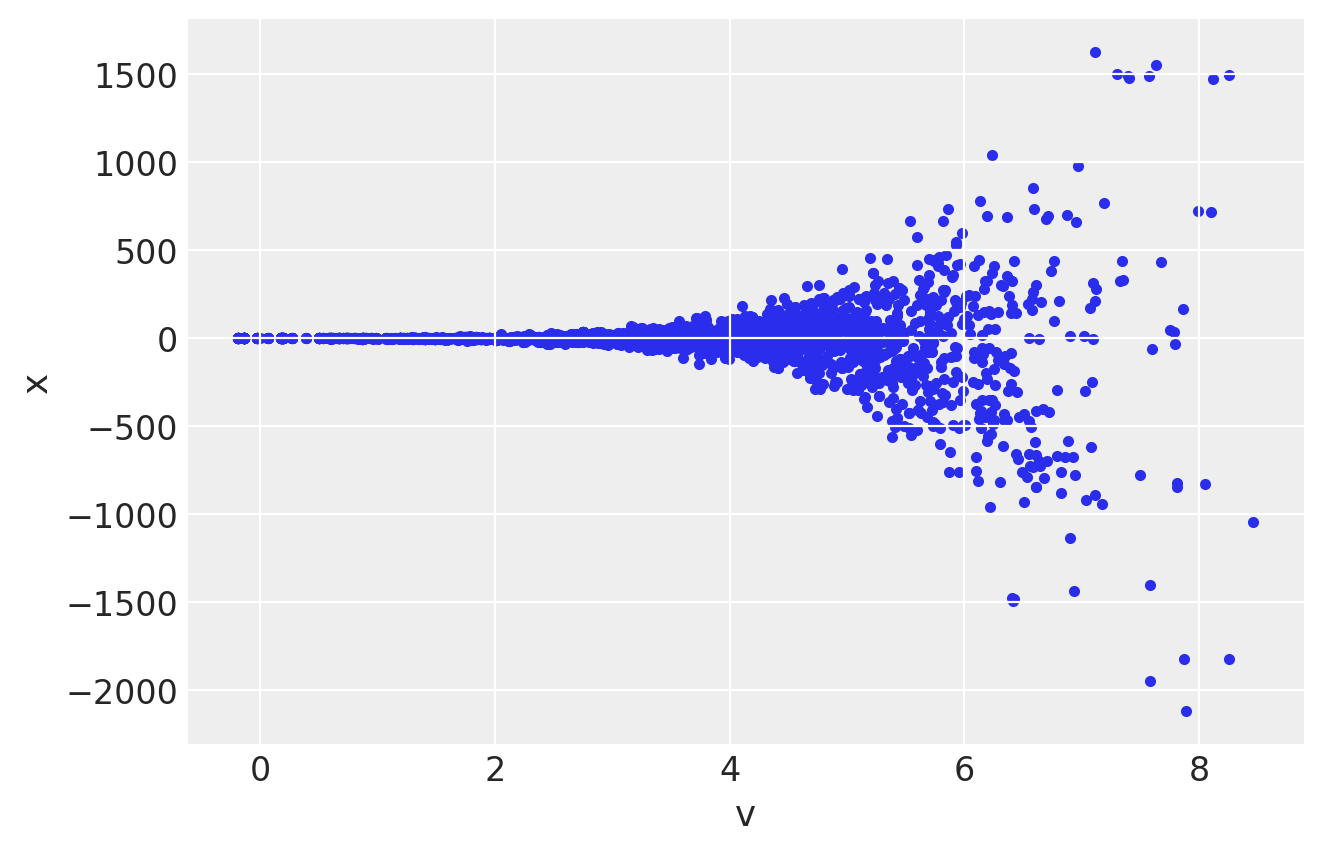

In [30]:
az.plot_pair(idata_13_7, textsize=12);

#### Code 13.27

In [31]:
with pm.Model() as m_13_7nc:
    v = pm.Normal("v", 0.0, 3.0)
    z = pm.Normal("z", 0.0, 1.0)
    x = pm.Deterministic("x", z * pm.math.exp(v))

    trace_13_7nc = pm.sample(random_seed=RANDOM_SEED)
    idata_13_7nc = az.from_pymc3(trace_13_7nc)
az.summary(idata_13_7nc, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


mean       sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
v  0.04     2.91     -4.50       4.71       0.05     0.05   3512.20  1986.09   
z -0.01     1.00     -1.58       1.60       0.02     0.02   3561.88  1796.93   
x -8.35  2814.79    -22.99      24.48      34.78    34.20   6549.52  3387.56   

   ess_bulk  ess_tail  r_hat  
v   3520.09   2816.31    1.0  
z   3560.91   2759.12    1.0  
x   2900.48   2969.82    1.0

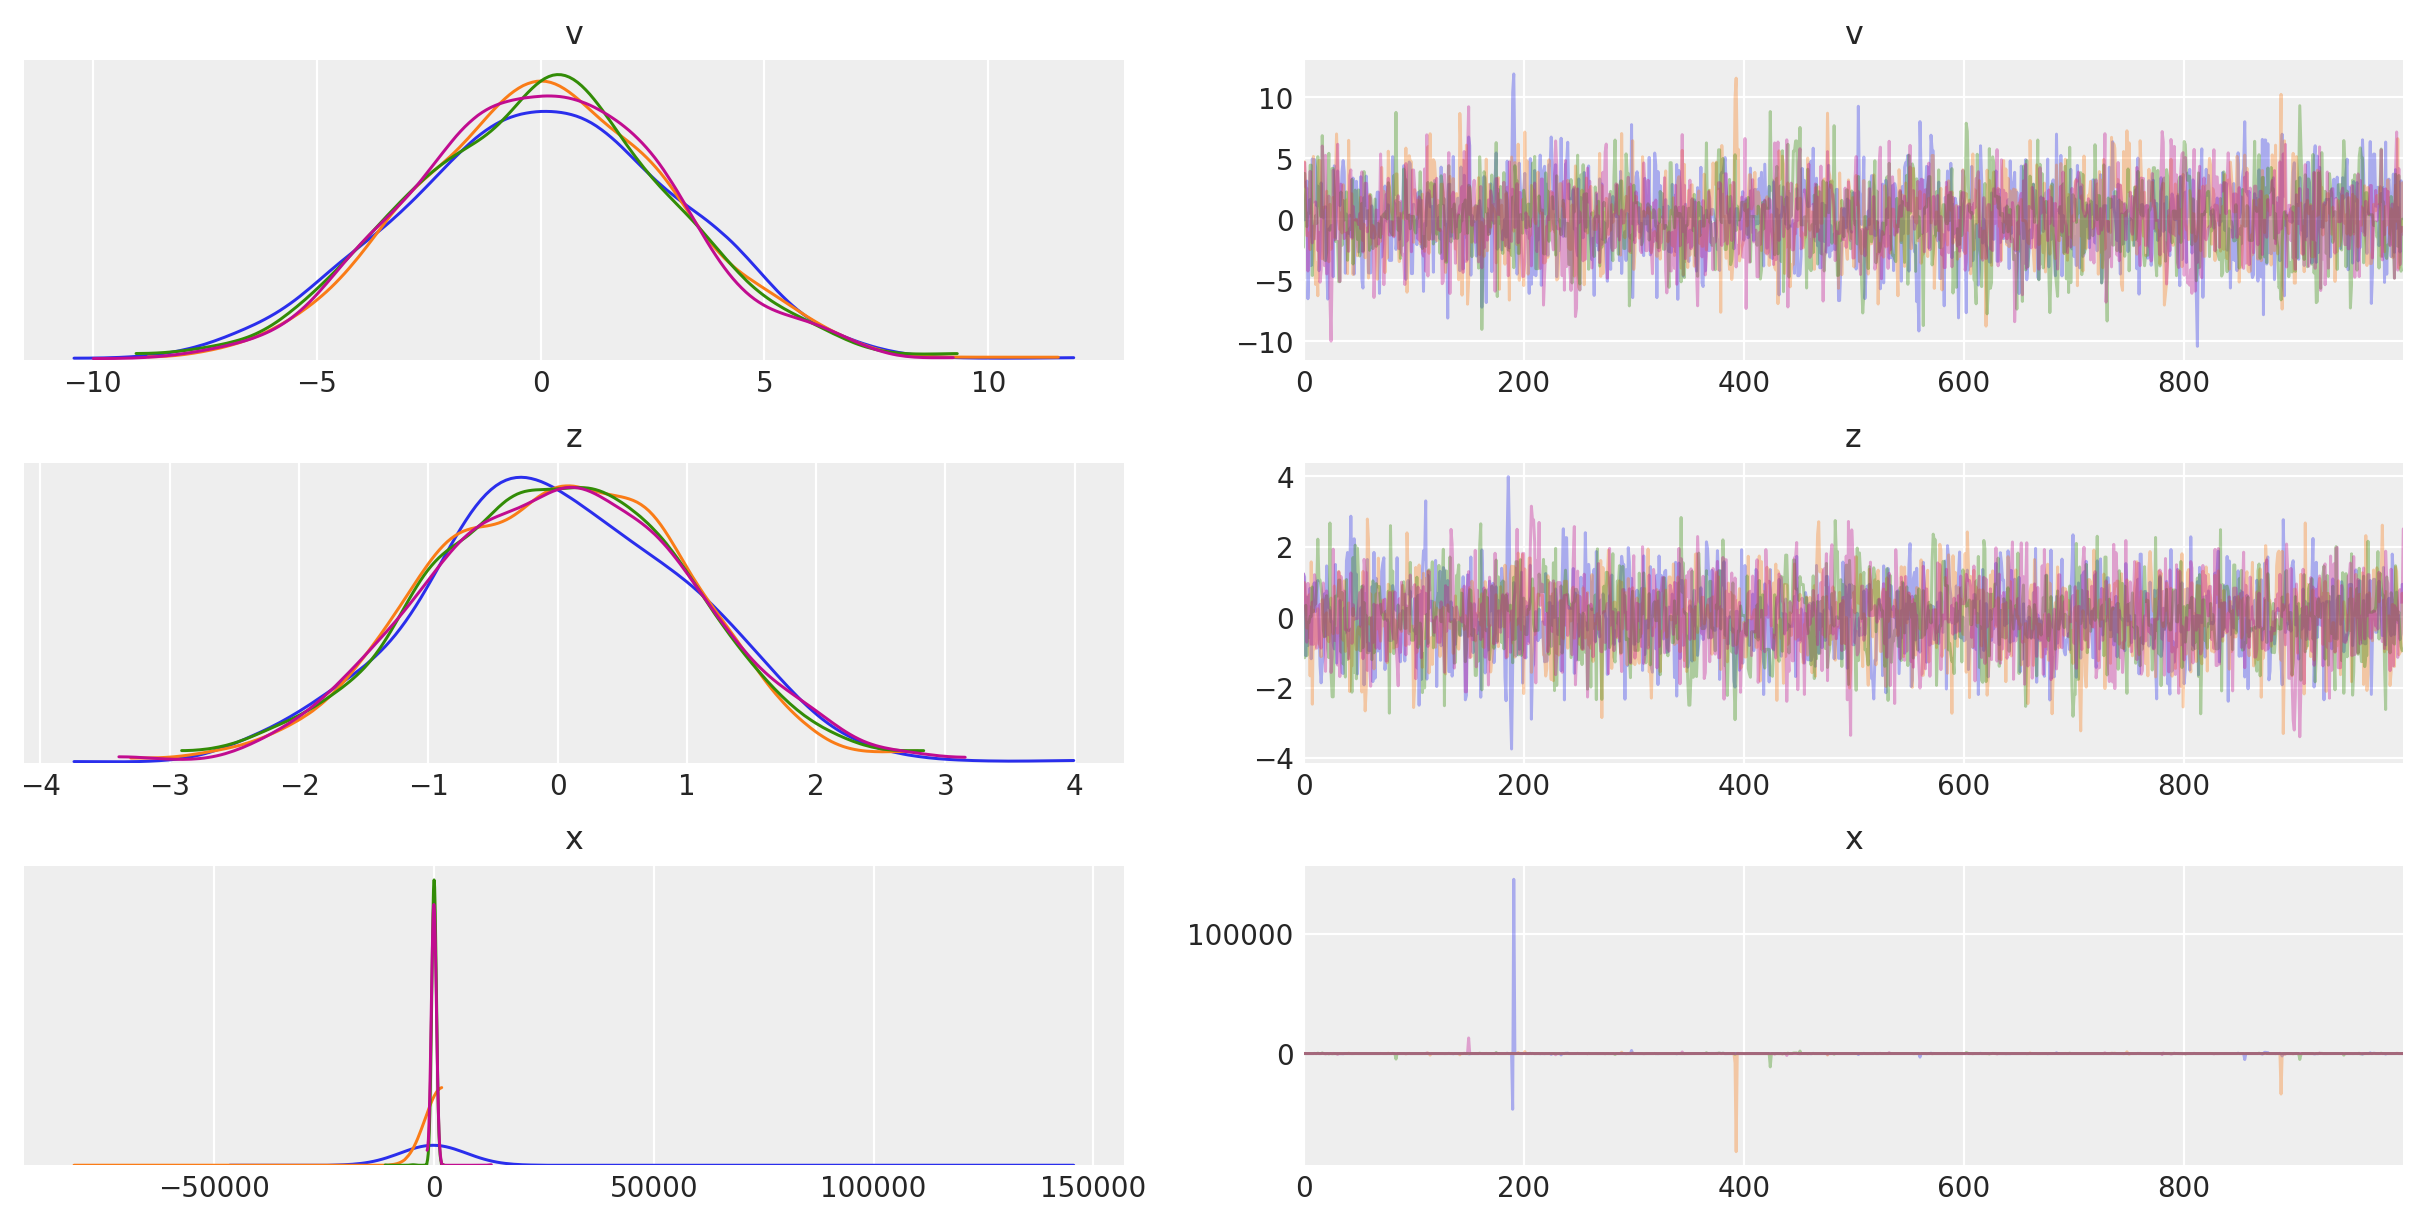

In [32]:
az.plot_trace(idata_13_7nc);

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/plots/pairplot.py:167: UserWarning: fill_last and contour will be deprecated. Please use kde_kwargs
  "fill_last and contour will be deprecated. Please use kde_kwargs", UserWarning,


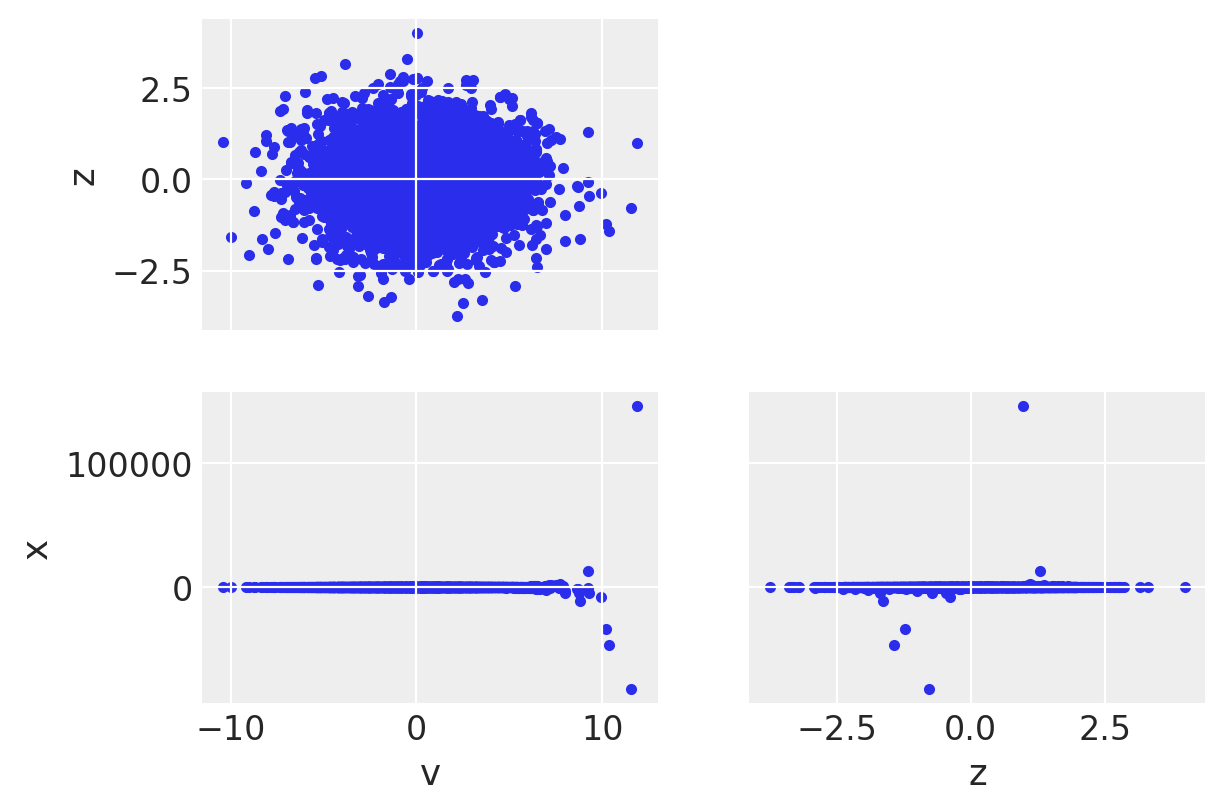

In [33]:
az.plot_pair(idata_13_7nc, textsize=12, figsize=(10, 7));

#### Code 13.28

In [34]:
with m_13_4:
    trace_13_4 = pm.sample(tune=3000, target_accept=0.99, random_seed=RANDOM_SEED)
    idata_13_4 = az.from_pymc3(trace_13_4)
az.summary(idata_13_4, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 112 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


mean    sd  hpd_5.5%  hpd_94.5%  mcse_mean  mcse_sd  ess_mean  \
a_bar    0.57  0.73     -0.63       1.65       0.02     0.01   1802.53   
a[0]    -0.37  0.37     -0.92       0.26       0.01     0.01    920.73   
a[1]     4.67  1.39      2.77       6.45       0.04     0.03   1103.85   
a[2]    -0.68  0.37     -1.28      -0.10       0.01     0.01    919.48   
a[3]    -0.68  0.37     -1.29      -0.09       0.01     0.01    891.92   
a[4]    -0.37  0.37     -0.99       0.20       0.01     0.01    947.74   
a[5]     0.57  0.37     -0.01       1.18       0.01     0.01    941.65   
a[6]     2.08  0.46      1.31       2.77       0.01     0.01   1248.87   
g[0]    -0.16  0.21     -0.51       0.12       0.01     0.01    663.57   
g[1]     0.04  0.17     -0.21       0.35       0.00     0.00   1745.48   
g[2]     0.06  0.18     -0.22       0.34       0.00     0.00   1300.56   
g[3]     0.01  0.17     -0.27       0.28       0.00     0.00   1961.44   
g[4]    -0.03  0.18     -0.34       0.22       0.00     0.00   2082.07   
g[5]     0.11  0.19     -0.14       0.44       0.01     0.00    877.55   
b[0]    -0.12  0.30     -0.59       0.37       0.01     0.01    866.41   
b[1]     0.41  0.31     -0.12       0.88       0.01     0.01    919.52   
b[2]    -0.47  0.31     -0.96       0.02       0.01     0.01    916.92   
b[3]     0.29  0.31     -0.19       0.78       0.01     0.01    884.39   
sigma_a  2.00  0.66      1.03       2.86       0.02     0.01   1762.81   
sigma_g  0.20  0.17      0.00       0.40       0.01     0.01    357.49   

          ess_sd  ess_bulk  ess_tail  r_hat  
a_bar    1356.89   1838.65   2235.24   1.00  
a[0]      920.73    920.34   1771.34   1.00  
a[1]      884.25   1506.10   1149.55   1.00  
a[2]      919.48    918.99   1684.09   1.00  
a[3]      891.92    893.48   1556.00   1.00  
a[4]      947.74    949.05   1777.61   1.00  
a[5]      941.65    940.13   1643.29   1.00  
a[6]     1248.87   1250.34   1940.16   1.00  
g[0]      663.57    765.79   1626.80   1.00  
g[1]      854.40   2228.14   1599.47   1.01  
g[2]      771.03   1625.27   1396.97   1.01  
g[3]      830.38   2087.48   1449.74   1.01  
g[4]      925.82   2209.80   1783.61   1.01  
g[5]      846.35   1026.90   1495.93   1.00  
b[0]      866.41    866.53   1341.17   1.00  
b[1]      919.52    918.46   1436.03   1.00  
b[2]      916.92    917.69   1597.99   1.00  
b[3]      884.39    883.24   1595.59   1.00  
sigma_a  1714.26   1908.21   2097.60   1.00  
sigma_g   357.49    211.31    210.82   1.02

#### Code 13.29

In [35]:
with pm.Model() as m_13_4nc:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    z = pm.Normal("z", 0.0, 1.0, shape=Nactor)
    x = pm.Normal("x", 0.0, 1.0, shape=Nblock)
    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)

    _ = pm.Deterministic("a", a_bar + z * sigma_a)  # actor intercepts
    _ = pm.Deterministic("g", x * sigma_g)  # block intercepts
    p = pm.math.invlogit(a_bar + z[actor] * sigma_a + x[block] * sigma_g + b[treatment])
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_4nc = pm.sample(tune=3000, target_accept=0.9, random_seed=RANDOM_SEED)
    idata_13_4nc = az.from_pymc3(trace_13_4nc)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, x, z, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 31 seconds.


#### Code 13.30

In [36]:
m13_4 = az.summary(idata_13_4, kind="diagnostics", round_to=2)["ess_bulk"]
m13_4.name = "m13_4"

m13_4nc = az.summary(idata_13_4nc, var_names=["~x", "~z"], kind="diagnostics", round_to=2)[
    "ess_bulk"
]
m13_4nc.name = "m13_4nc"

ess_bulk = pd.concat([m13_4, m13_4nc], axis=1, sort=True)

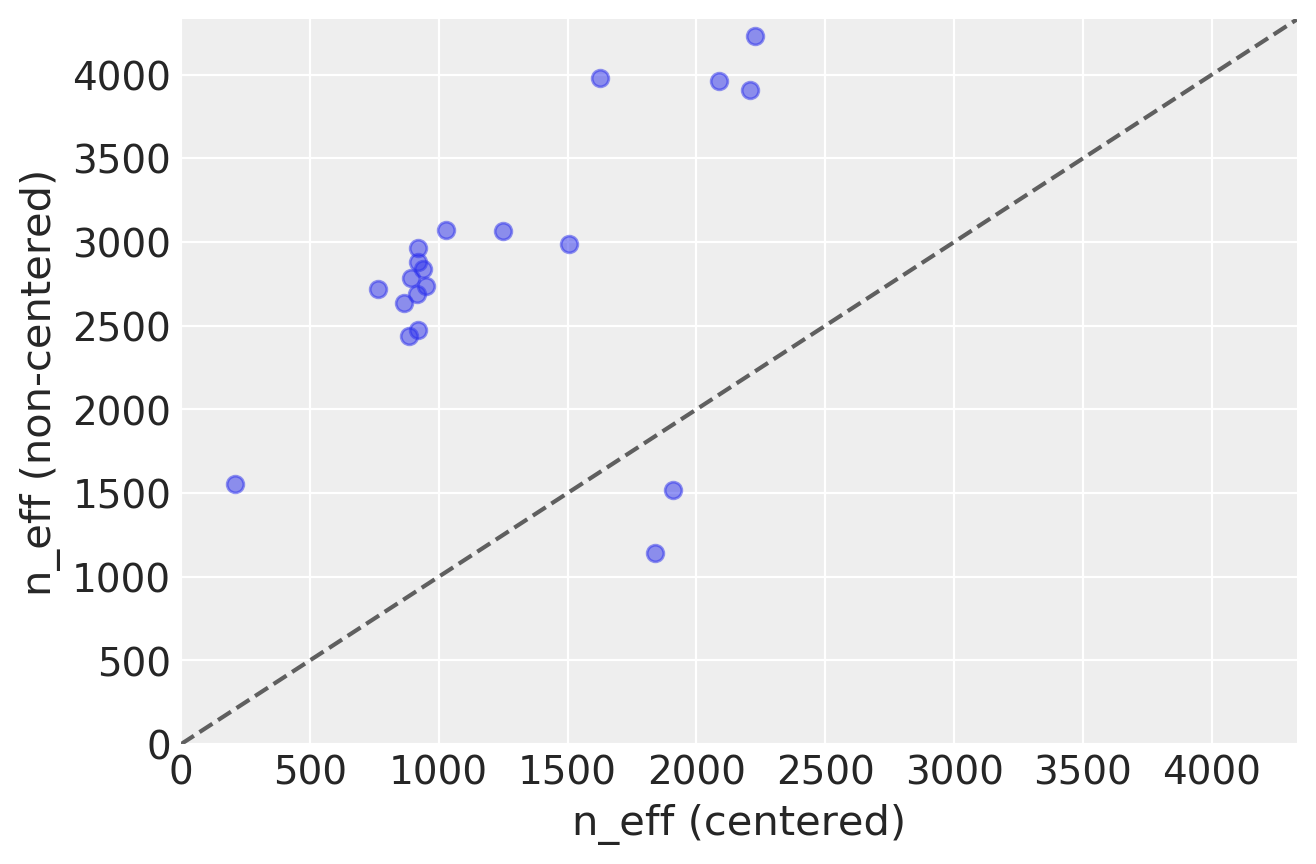

In [37]:
plt.plot(ess_bulk.m13_4.values, ess_bulk.m13_4nc.values, "o", alpha=0.5)

max_val = ess_bulk.m13_4nc.max() + 100
plt.plot(np.arange(max_val), np.arange(max_val), "k--", alpha=0.6)

plt.xlabel("n_eff (centered)")
plt.xlim(0, max_val)

plt.ylabel("n_eff (non-centered)")
plt.ylim(0, max_val);

#### Code 13.31

Before sampling posterior predictive samples, let's redefine the model with shared variables (`pm.Data`), to be able to change them when we'll do posterior predictive checks below:

In [38]:
with pm.Model() as m_13_4:
    a_bar = pm.Normal("a_bar", 0.0, 1.5)
    sigma_a = pm.Exponential("sigma_a", 1.0)
    sigma_g = pm.Exponential("sigma_g", 1.0)

    a = pm.Normal("a", a_bar, sigma_a, shape=Nactor)
    g = pm.Normal("g", 0.0, sigma_g, shape=Nblock)
    b = pm.Normal("b", 0.0, 0.5, shape=Ntreatments)

    actor_ = pm.Data("actor", actor)
    block_ = pm.Data("block", block)
    treatment_ = pm.Data("treatment", treatment)
    p = pm.Deterministic("p", pm.math.invlogit(a[actor_] + g[block_] + b[treatment_]))
    pulled_left = pm.Binomial("pulled_left", 1, p, observed=d.pulled_left)

    trace_13_4 = pm.sample(tune=3000, target_accept=0.99, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, g, a, sigma_g, sigma_a, a_bar]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 113 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


In [39]:
chimp = 2
new_data = dict(actor=np.repeat(chimp - 1, 4), block=np.repeat(0, 4), treatment=np.arange(4))

with m_13_4:
    pm.set_data(new_data)
    post_pred_p = pm.sample_posterior_predictive(
        trace_13_4, var_names=["p"], random_seed=RANDOM_SEED
    )["p"]

post_pred_p.mean(0).round(2), az.hpd(post_pred_p).round(2)

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (4). Passed array should have shape (chains, draws, *shape)
  UserWarning,


(array([0.98, 0.99, 0.97, 0.99]),
 array([[0.95, 1.  ],
        [0.97, 1.  ],
        [0.93, 1.  ],
        [0.97, 1.  ]]))

In [40]:
def chimp_pp_plot(hpd_data, mean_data, title):
    _, ax = plt.subplots(1, 1, figsize=(5, 5))
    az.plot_hpd(range(4), hpd_data)
    ax.plot(mean_data)

    ax.set_ylim(0, 1.1)
    ax.set_xlabel("treatment")
    ax.set_ylabel("proportion pulled left")
    ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))
    plt.title(title);

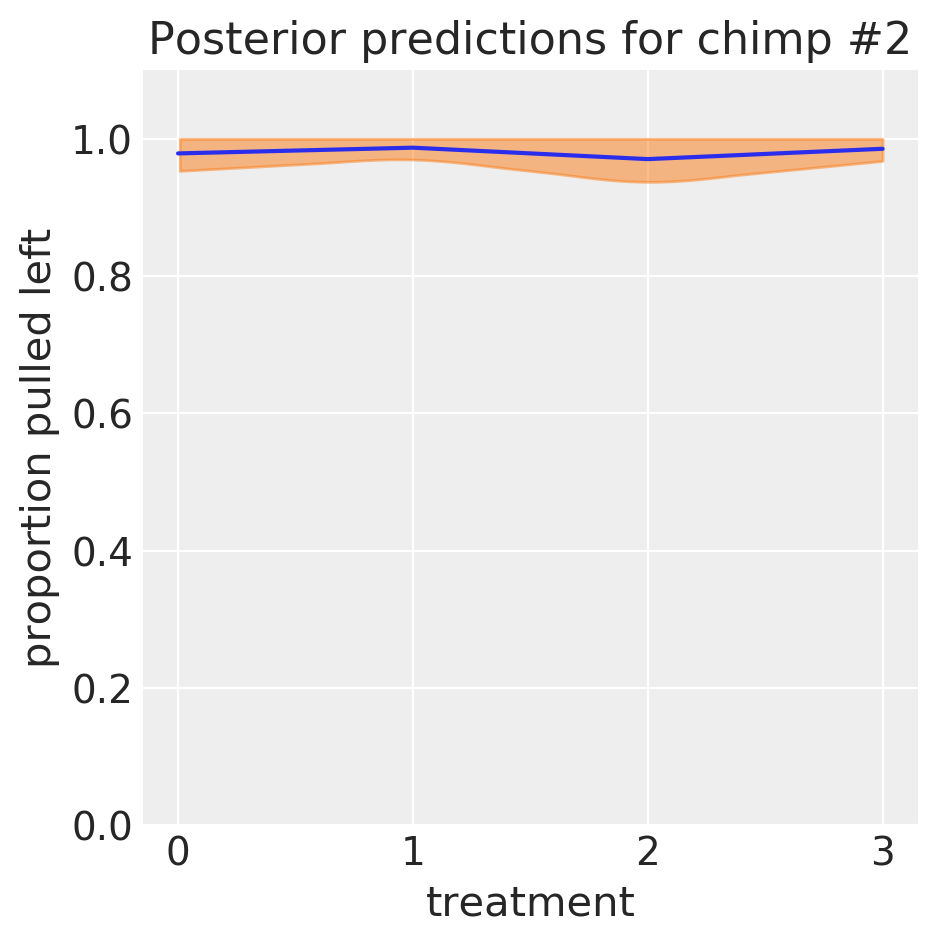

In [41]:
chimp_pp_plot(
    hpd_data=post_pred_p,
    mean_data=post_pred_p.mean(0),
    title=f"Posterior predictions for chimp #{chimp}",
)

#### Code 13.32

In [42]:
post = idata_13_4.posterior.rename_dims(
    {"a_dim_0": "actor", "g_dim_0": "block_id", "b_dim_0": "treatment"}
)
post

<xarray.Dataset>
Dimensions:  (actor: 7, block_id: 6, chain: 4, draw: 1000, treatment: 4)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
    a_dim_0  (actor) int64 0 1 2 3 4 5 6
    g_dim_0  (block_id) int64 0 1 2 3 4 5
    b_dim_0  (treatment) int64 0 1 2 3
Dimensions without coordinates: actor, block_id, treatment
Data variables:
    a_bar    (chain, draw) float64 0.44 0.4718 0.6892 ... 2.199 1.418 0.2977
    a        (chain, draw, actor) float64 0.01955 6.252 -0.5251 ... 1.005 2.346
    g        (chain, draw, block_id) float64 -0.3874 -0.1333 ... 0.08376 0.272
    b        (chain, draw, treatment) float64 -0.05165 0.5962 ... -0.2943
    sigma_a  (chain, draw) float64 1.774 1.689 1.981 3.336 ... 2.335 3.045 1.062
    sigma_g  (chain, draw) float64 0.2173 0.2246 0.6527 ... 0.1854 0.1931 0.2906
Attributes:
    created_at:                 2020-05-18T15:37:47.591223
    arviz_version:              0.7.0
    

In [43]:
post["a"].shape

(4, 1000, 7)

#### Code 13.33

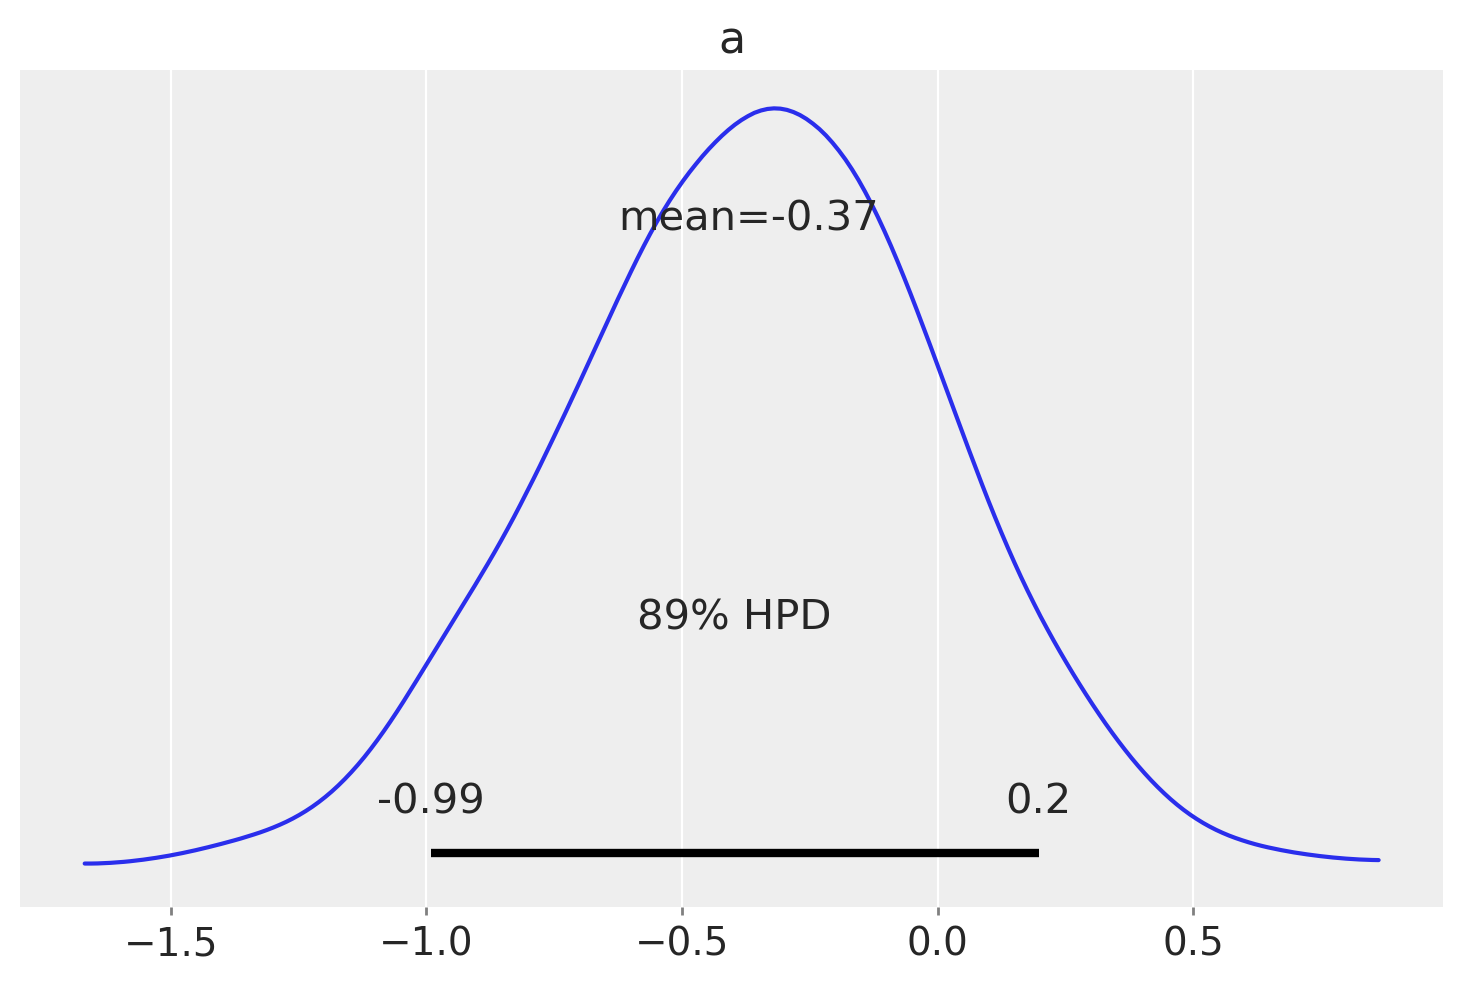

In [44]:
az.plot_posterior(post, var_names=["a"], coords={"actor": 4});

#### Code 13.34

In [45]:
def p_link(actor, block_id):
    logodds = post.sel(actor=actor)["a"] + post.sel(block_id=block_id)["g"] + post["b"]
    return logistic(logodds)

#### Code 13.35

In [46]:
p_raw = p_link(actor=1, block_id=0)
p_raw.mean(dim=("chain", "draw")).data.round(2), az.hpd(p_raw.data).round(2)

(array([0.98, 0.99, 0.97, 0.99]),
 array([[0.95, 1.  ],
        [0.97, 1.  ],
        [0.93, 1.  ],
        [0.97, 1.  ]]))

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (4). Passed array should have shape (chains, draws, *shape)
  UserWarning,


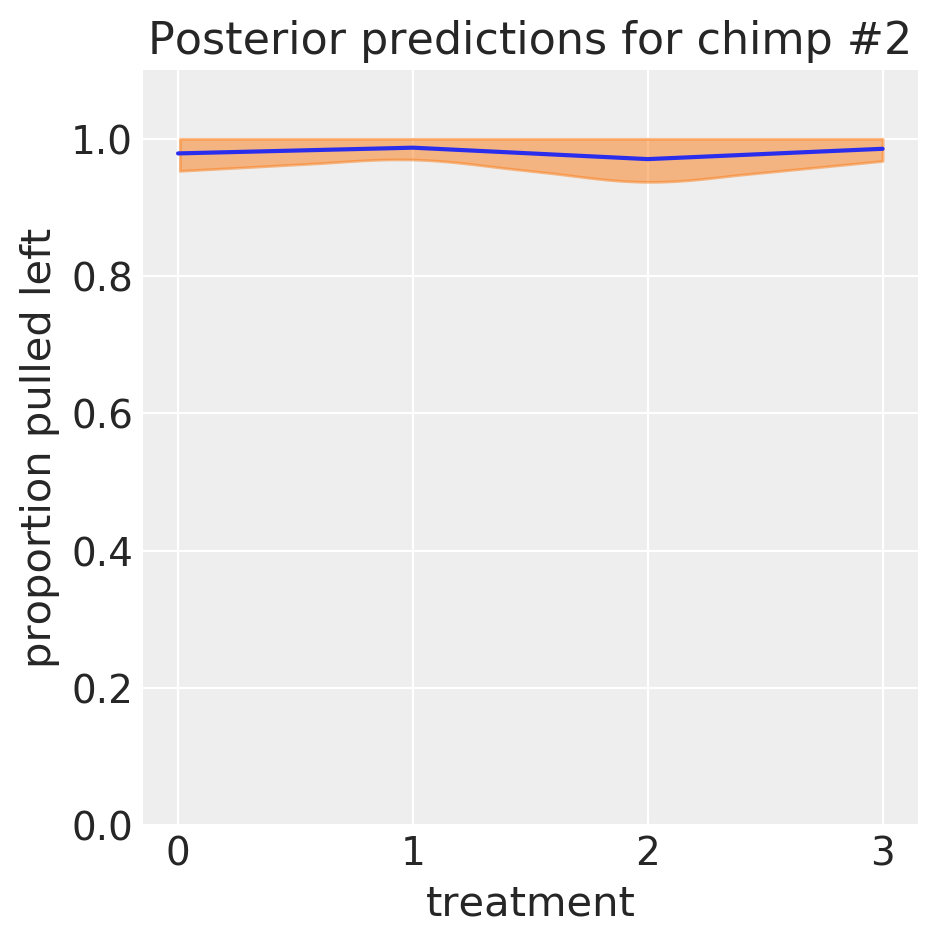

In [47]:
chimp_pp_plot(
    hpd_data=p_raw.data,
    mean_data=p_raw.mean(dim=("chain", "draw")).data,
    title=f"Posterior predictions for chimp #{chimp}",
)

#### Code 13.36

We don't need this function: we'll just add the posterior for `a_bar` and the posterior for `b`, and xarray (which is the format ArviZ uses for its `InferenceData`) will take care of the shape handling for us, even if `post["a_bar"]` and `post["b"]` have different shapes.

#### Code 13.37

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (4). Passed array should have shape (chains, draws, *shape)
  UserWarning,


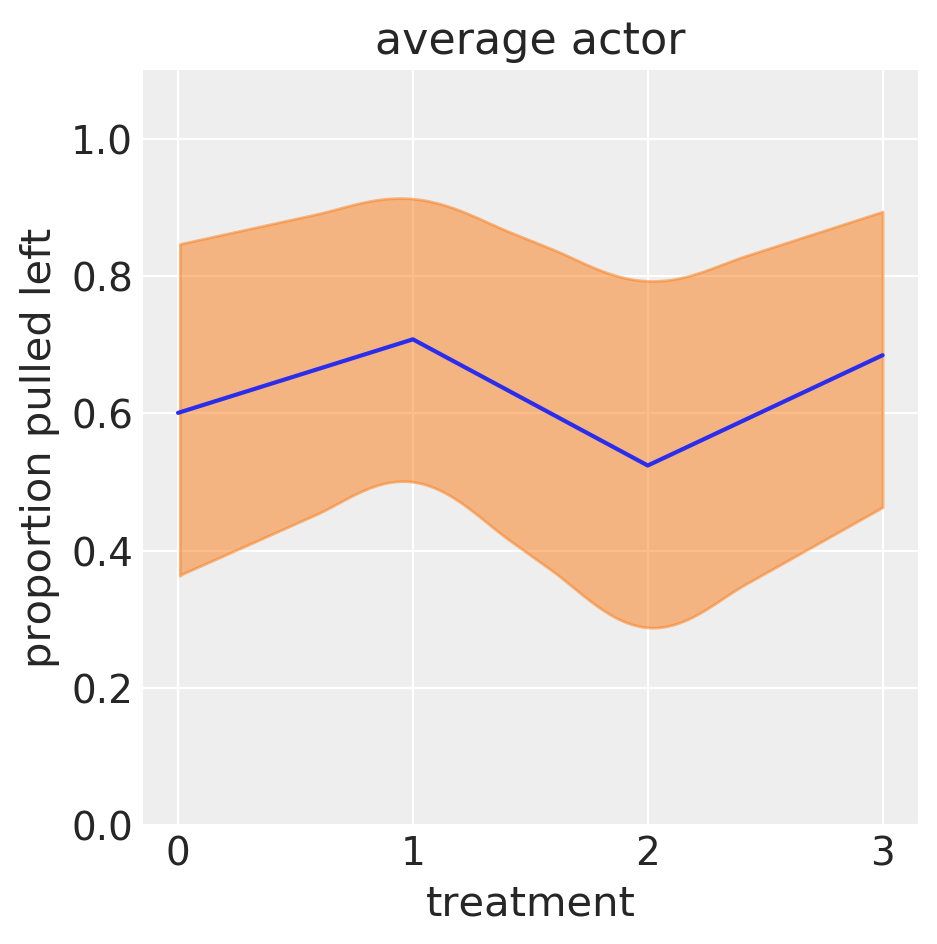

In [48]:
p_raw = logistic(post["a_bar"] + post["b"])

chimp_pp_plot(
    hpd_data=p_raw.data,
    mean_data=p_raw.mean(dim=("chain", "draw")).data,
    title="average actor",
)

#### Code 13.38

/Users/alex_andorra/opt/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (4). Passed array should have shape (chains, draws, *shape)
  UserWarning,


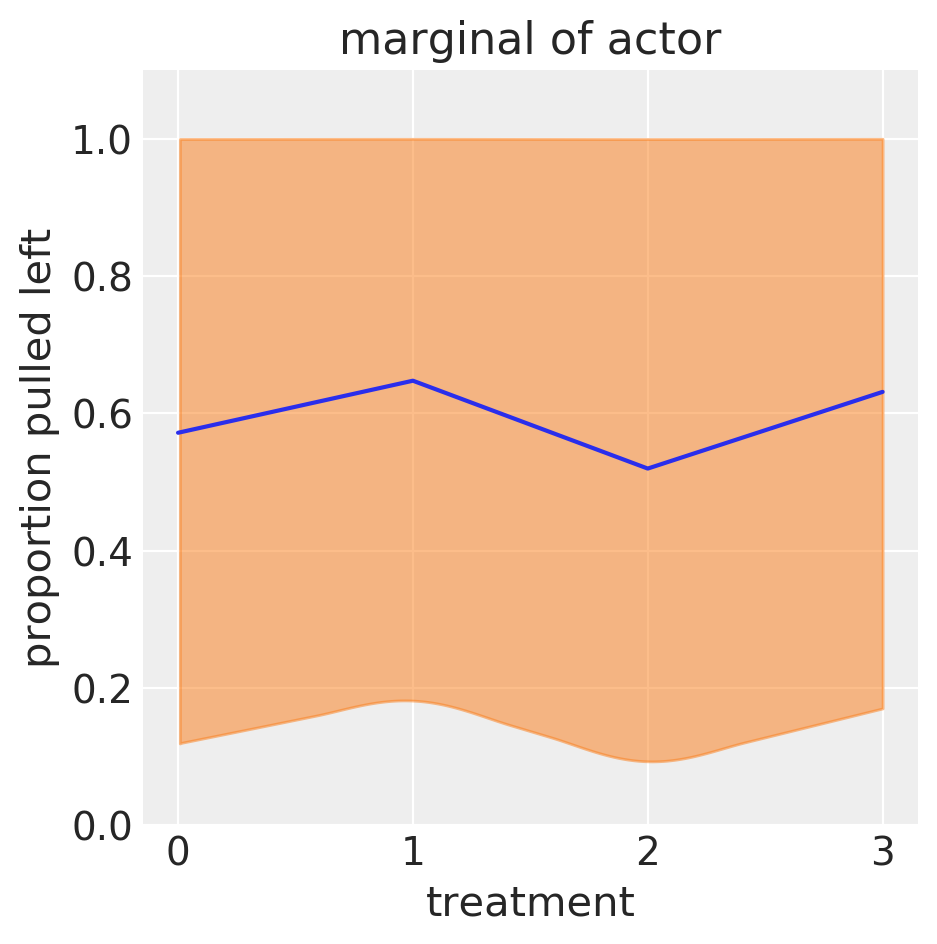

In [49]:
a_sim = np.random.normal(loc=post["a_bar"], scale=post["sigma_a"])
p_raw_asim = logistic(a_sim[:, :, None] + post["b"])

chimp_pp_plot(
    hpd_data=p_raw_asim.data,
    mean_data=p_raw_asim.mean(dim=("chain", "draw")).data,
    title="marginal of actor",
)

#### Code 13.39

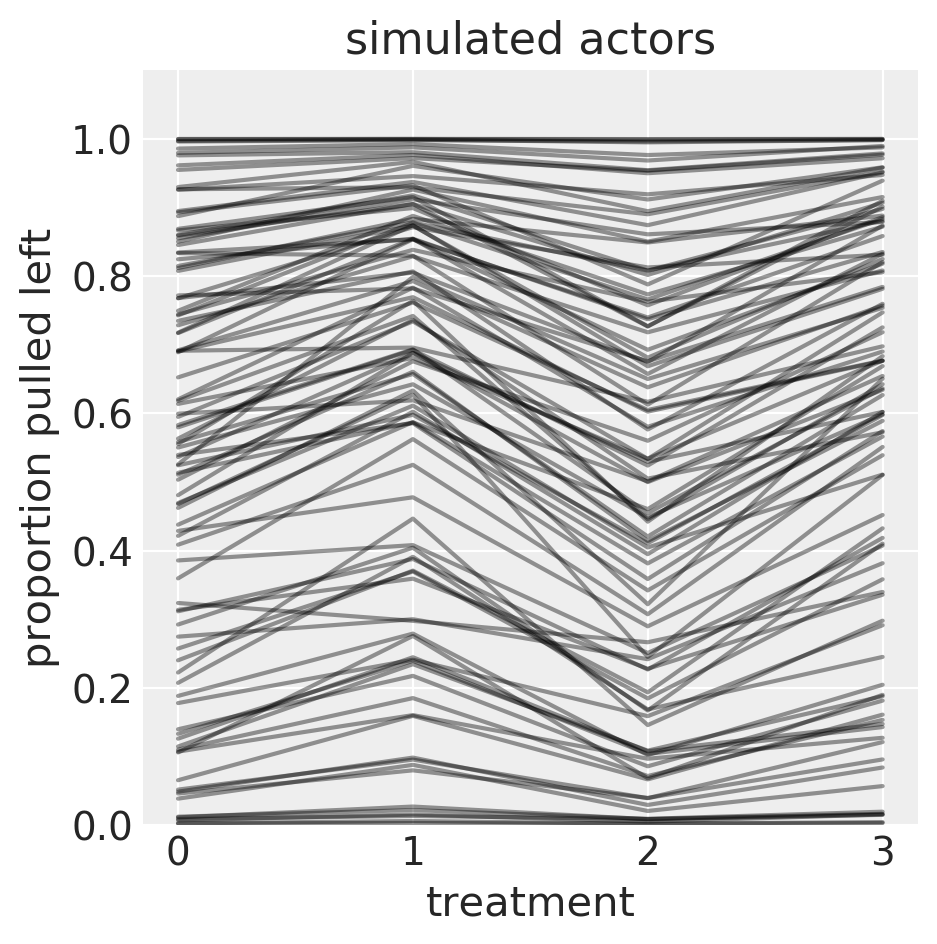

In [50]:
p_raw_asim = p_raw_asim.stack(sample=("chain", "draw"))

_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(np.tile(np.arange(4), (100, 1)).T, p_raw_asim[:, :100].data, "k", alpha=0.4)

ax.set_ylim(0, 1.1)
ax.set_xlabel("treatment")
ax.set_ylabel("proportion pulled left")
ax.set_xticks(range(4), ("R/N", "L/N", "R/P", "L/P"))
plt.title("simulated actors");

In [51]:
%load_ext watermark
%watermark -n -u -v -iv -w

scipy      1.4.1
pymc3      3.8
numpy      1.18.1
pandas     0.25.3
arviz      0.7.0
matplotlib 3.1.3
last updated: Mon May 18 2020 

CPython 3.7.6
IPython 7.12.0
watermark 2.0.1
